In [40]:
# importing libs for data EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import zscore
import warnings

#importing libs for data modeling

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# DATA INFORMATION

In [37]:
# Loading the CSV
data = pd.read_csv("2019.csv")

In [38]:
# Display the head of dataset
data.head(10)

Província    Distrito  W1  W2  W3  W4  W5  W6  W7  W8  ...  W44  W45  W46  \
0    Niassa        Lago   0   0   0   0   0   0   0   0  ...    0    0    0   
1    Niassa    Lichinga   0   0   0   0   0   0   0   0  ...    0    0    0   
2    Niassa  Mecanhelas   0   0   0   0   0   0   0   0  ...    0    0    0   
3    Niassa       Sanga   0   0   0   0   0   0   0   0  ...    0    0    0   
4    Niassa   Mandimba*   0   0   0   0   0   0   0   0  ...    0    0    0   
5    Niassa  Chimbunila   0   0   0   0   0   0   0   0  ...    0    0    0   
6    Niassa      Majune   0   0   0   0   0   0   0   0  ...    0    0    0   
7    Niassa     Ngauma*   0   0   0   0   0   0   0   0  ...    0    0    0   
8    Niassa     Muembe*   0   0   0   0   0   0   0   0  ...    0    0    0   
9    Niassa      Mavago   0   0   0   0   0   0   0   0  ...    0    0    0   

   W47  W48  W49  W50  W51  W52  W53  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0  
5    0    0    0    0    0    0    0  
6    0    0    0    0    0    0    0  
7    0    0    0    0    0    0    0  
8    0    0    0    0    0    0    0  
9    0    0    0    0    0    0    0  

[10 rows x 55 columns]

In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Província  73 non-null     object 
 1   Distrito   73 non-null     object 
 2   W1         73 non-null     int64  
 3   W2         73 non-null     int64  
 4   W3         73 non-null     int64  
 5   W4         73 non-null     int64  
 6   W5         73 non-null     int64  
 7   W6         73 non-null     int64  
 8   W7         72 non-null     float64
 9   W8         73 non-null     int64  
 10  W9         73 non-null     int64  
 11  W10        73 non-null     int64  
 12  W11        73 non-null     int64  
 13  W12        73 non-null     int64  
 14  W13        73 non-null     int64  
 15  W14        73 non-null     int64  
 16  W15        73 non-null     int64  
 17  W16        73 non-null     int64  
 18  W17        73 non-null     int64  
 19  W18        73 non-null     int64  
 20  W19        7

In [5]:
# Display summary statistics
print(data.describe())

               W1          W2          W3          W4          W5          W6  \
count   73.000000   73.000000   73.000000   73.000000   73.000000   73.000000   
mean     5.369863    7.342466    9.767123    9.178082   10.315068   10.917808   
std     16.118060   23.986234   34.837528   26.214575   23.220487   23.759649   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    3.000000    6.000000    7.000000   13.000000   11.000000   
max    105.000000  185.000000  281.000000  195.000000  161.000000  153.000000   

               W7          W8          W9         W10  ...         W37  \
count   72.000000   73.000000   73.000000   73.000000  ...   73.000000   
mean    11.847222   11.246575   13.315068   16.589041  ...    1.383562   
std     27.619477   25.454633   36.302310   48.3

In [6]:
# Check for missing values
print(data.isnull().sum())

Província    0
Distrito     0
W1           0
W2           0
W3           0
W4           0
W5           0
W6           0
W7           1
W8           0
W9           0
W10          0
W11          0
W12          0
W13          0
W14          0
W15          0
W16          0
W17          0
W18          0
W19          0
W20          0
W21          0
W22          0
W23          0
W24          0
W25          0
W26          0
W27          0
W28          0
W29          0
W30          0
W31          0
W32          0
W33          0
W34          0
W35          0
W36          0
W37          0
W38          0
W39          0
W40          0
W41          0
W42          0
W43          0
W44          0
W45          0
W46          0
dtype: int64


In [7]:
# Total number of unique provinces
total_provinces = data['Província'].nunique()

# Total number of unique districts
total_districts = data['Distrito'].nunique()

print(f"Total number of unique provinces: {total_provinces}")
print(f"Total number of unique districts: {total_districts}")

Total number of unique provinces: 11
Total number of unique districts: 73


# EDA

## Total Value Across Weeks for Each Province
Calculation of Total Value: Total values across weeks are computed for each province by summing up the values of all weeks.

Sorting Provinces: Provinces are sorted based on their total values in descending order, highlighting which provinces have the highest and lowest total activity.

Visualization: A bar plot is used to visually represent the total value across weeks for each province, allowing for easy comparison.

Benefits: This analysis provides insights into the distribution of activity or quantity across provinces, aiding in decision-making, resource allocation, and understanding regional trends.

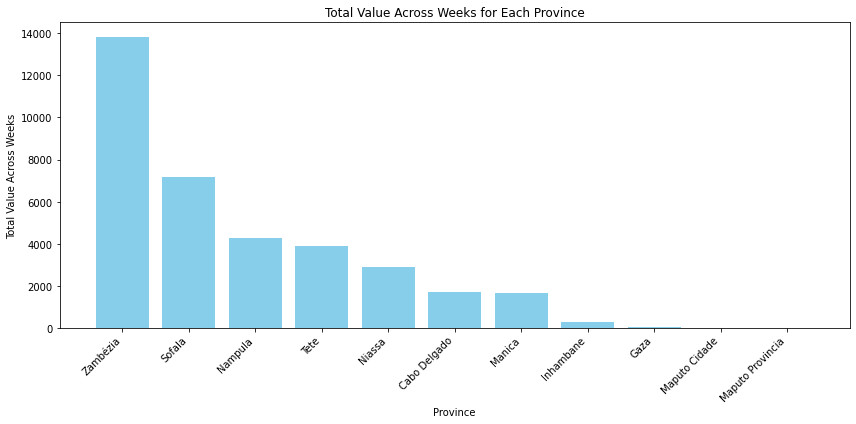

In [8]:
province_totals = data.groupby('Província').sum().sum(axis=1)

# Sort provinces based on total values
province_totals_sorted = province_totals.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(province_totals_sorted.index, province_totals_sorted.values, color='skyblue')
plt.xlabel('Province')
plt.ylabel('Total Value Across Weeks')
plt.title('Total Value Across Weeks for Each Province')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Number of Districts in Each Province

Counting Unique Districts: The number of unique districts within each province is computed using the groupby() function in pandas, followed by the nunique() method applied to the 'Distrito' column.

Visualization: A bar plot is used to visualize the number of districts in each province. Each bar represents a province, and its height corresponds to the number of unique districts within that province.

Insights: This analysis provides insights into the geographical distribution and complexity of administrative divisions within each province.

Interpretation: Provinces with a higher number of districts may exhibit greater administrative complexity or geographical diversity compared to those with fewer districts.

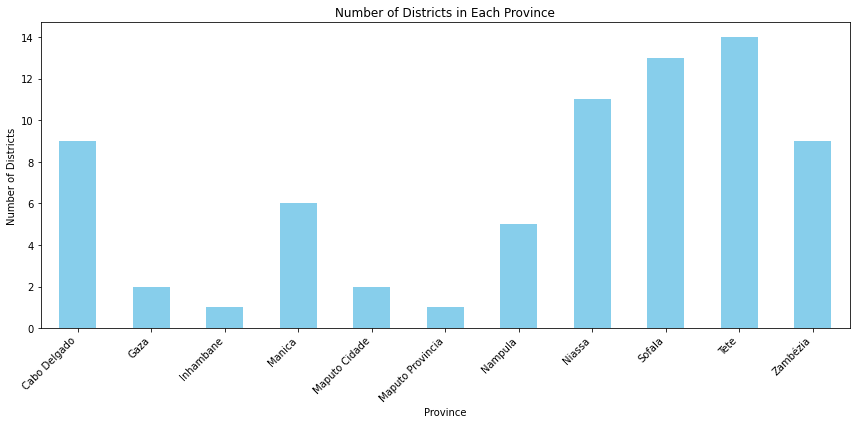

In [9]:
# Count the number of unique districts within each province
districts_per_province = data.groupby('Província')['Distrito'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
districts_per_province.plot(kind='bar', color='skyblue')
plt.xlabel('Province')
plt.ylabel('Number of Districts')
plt.title('Number of Districts in Each Province')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Correlation Matrix
Calculation of Correlation Matrix: The correlation matrix is computed using the corr() method, which calculates the Pearson correlation coefficient between pairs of variables in the dataset.

Visualization: The correlation matrix is visualized using a heatmap, where each cell represents the correlation coefficient between two variables. The heatmap's color intensity indicates the strength and direction of the correlation, with warmer colors (e.g., red) indicating positive correlation and cooler colors (e.g., blue) indicating negative correlation.

Interpretation: The correlation matrix helps identify relationships and dependencies between variables. High positive correlation coefficients suggest that the variables move in the same direction, while high negative correlation coefficients indicate that the variables move in opposite directions. A correlation coefficient close to zero suggests no linear relationship between variables.

Insights: Understanding the correlations between variables is crucial for identifying patterns, detecting multicollinearity, and selecting features for predictive modeling or analysis.

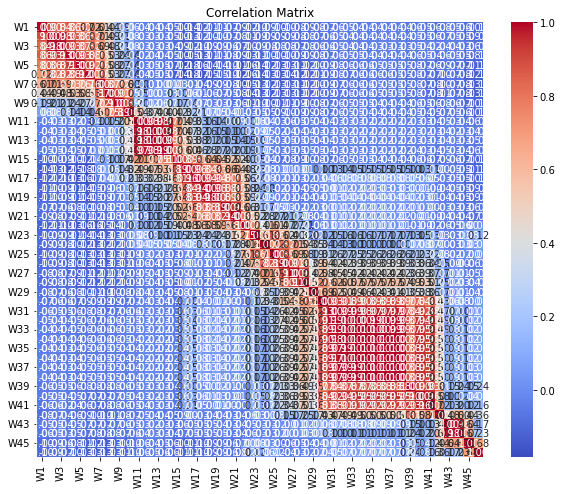

In [10]:
# Correlation Analysis
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Distribution of Numeric Variables

Identification of Numeric Variables: Numeric columns in the dataset are selected using the select_dtypes() function from numpy.

Visualization: For each numeric variable, a histogram is created to visualize its distribution. The number of bins is set to 20, and a kernel density estimate (KDE) curve is included to provide additional insights into the distribution's shape.

Interpretation: Histograms allow us to visualize the frequency distribution of each numeric variable, providing insights into its central tendency, spread, and shape. Common distributions include normal (bell-shaped), skewed, and multimodal distributions.

Insights: Understanding the distribution of numeric variables is essential for assessing data quality, detecting outliers, and selecting appropriate statistical methods and models for analysis.

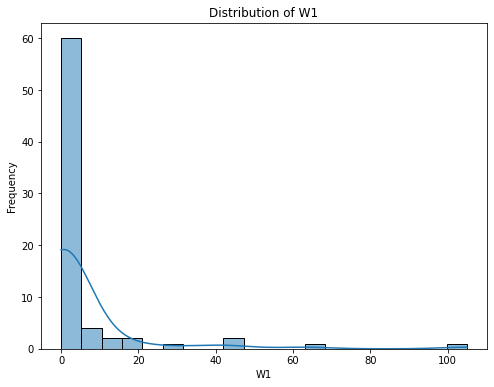

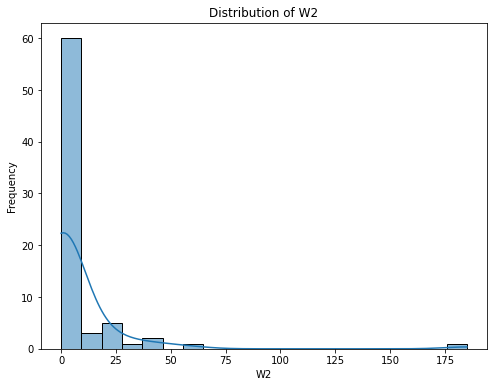

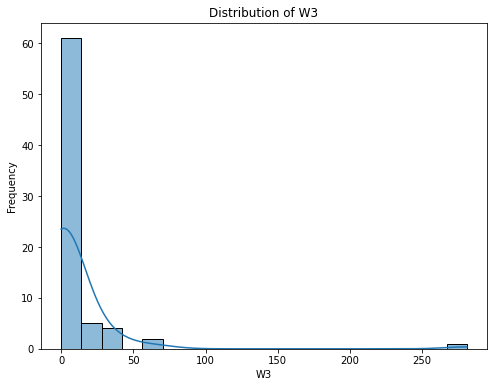

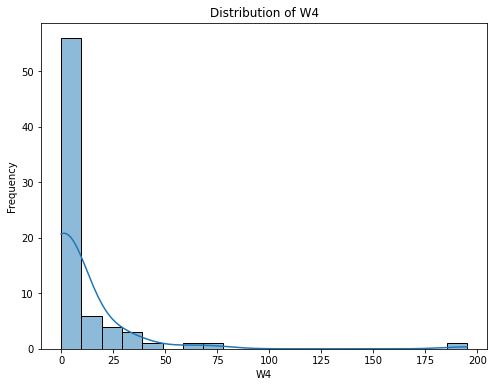

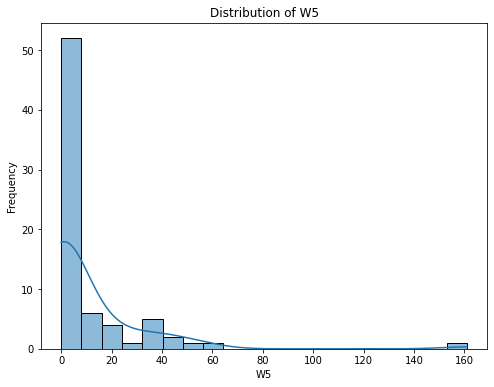

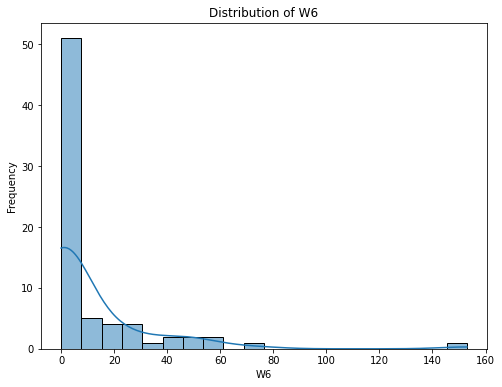

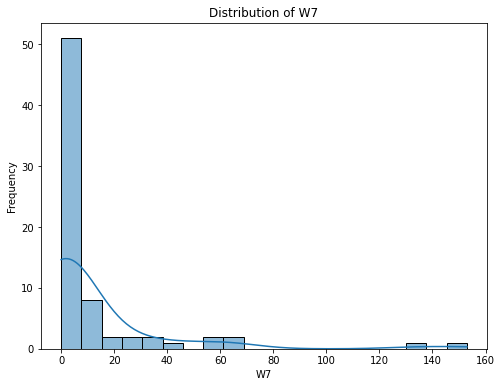

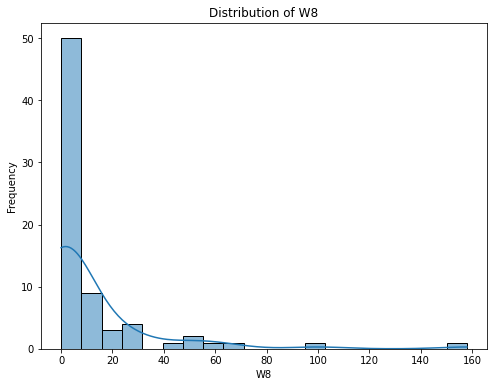

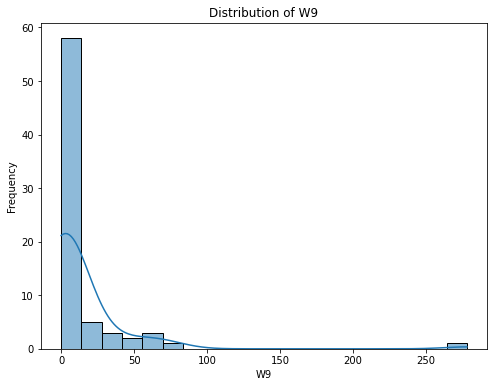

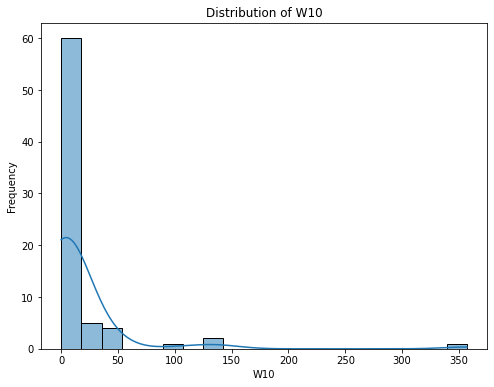

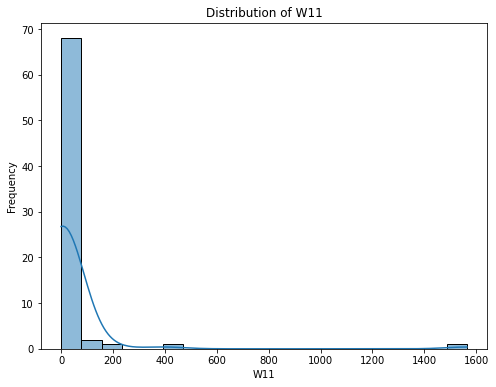

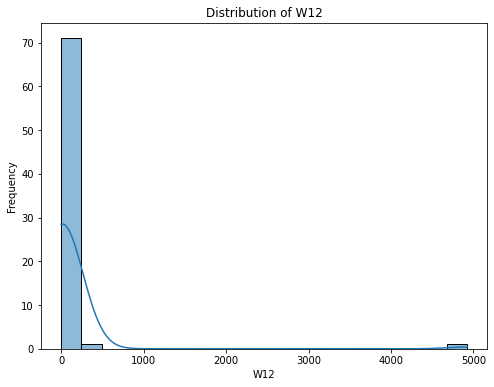

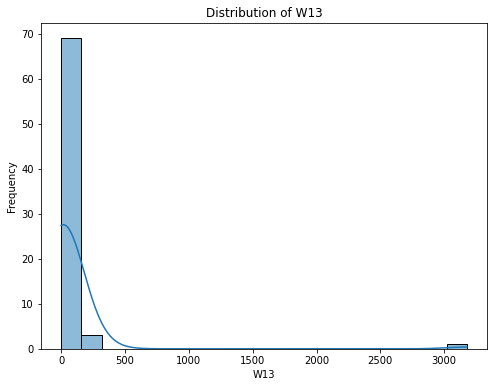

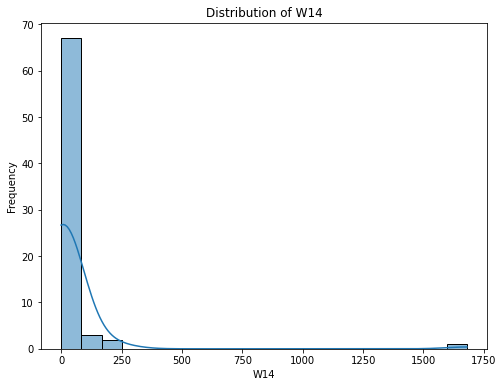

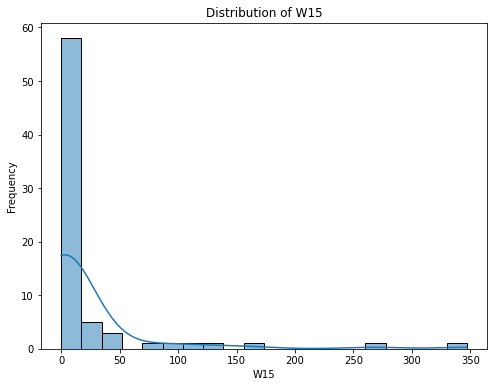

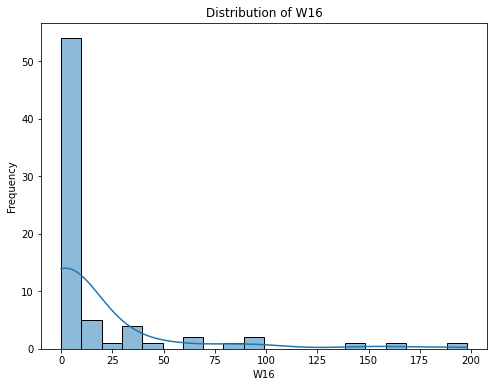

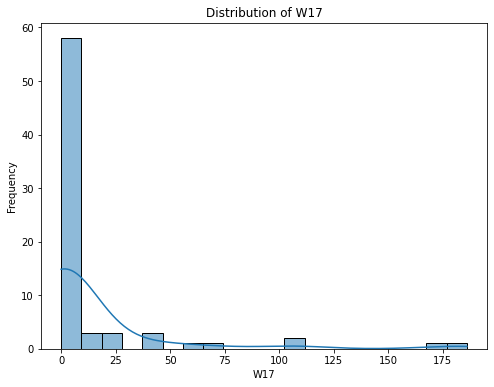

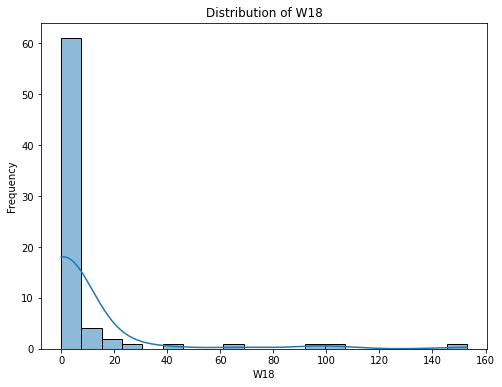

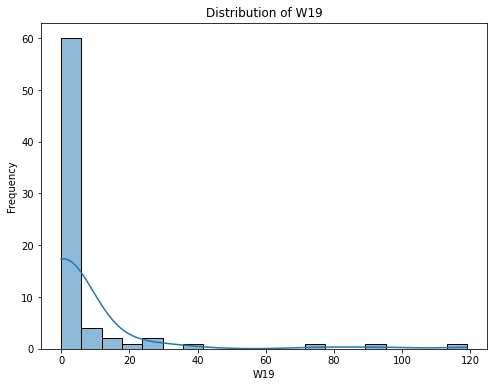

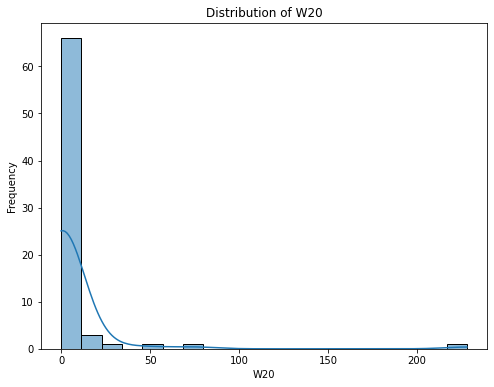

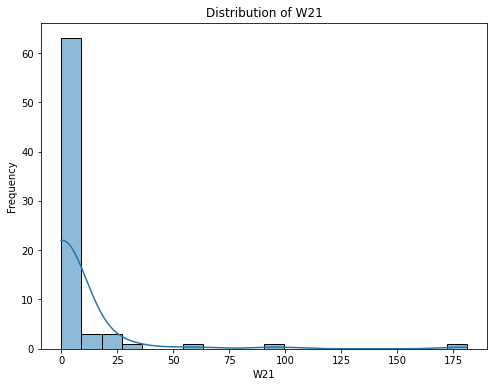

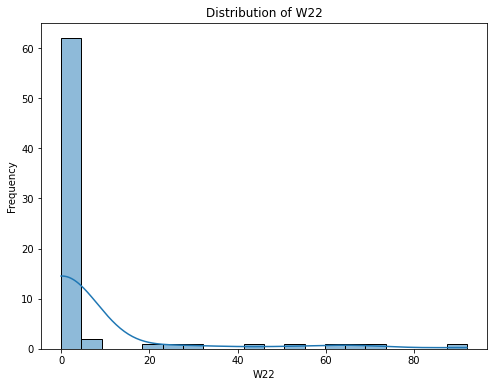

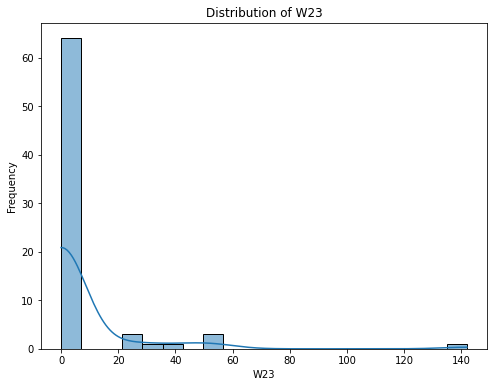

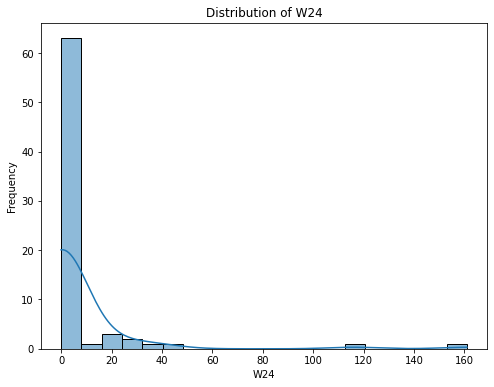

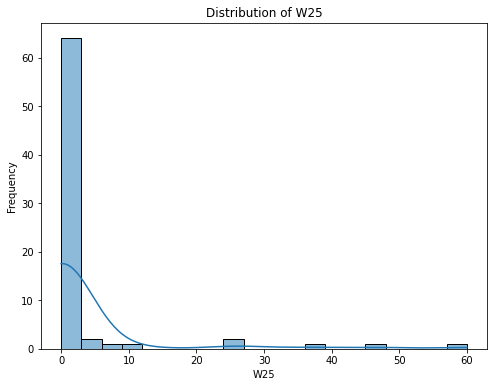

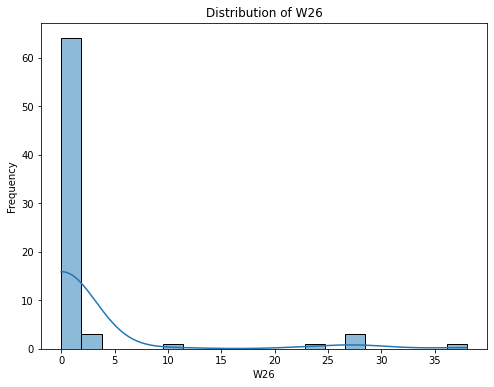

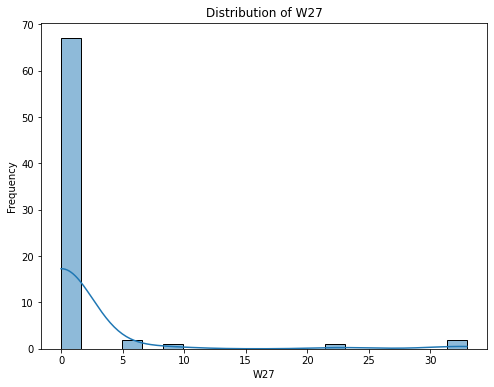

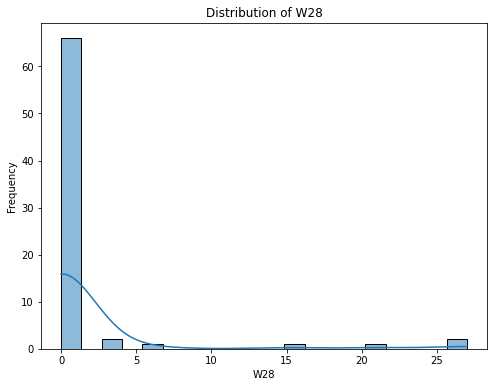

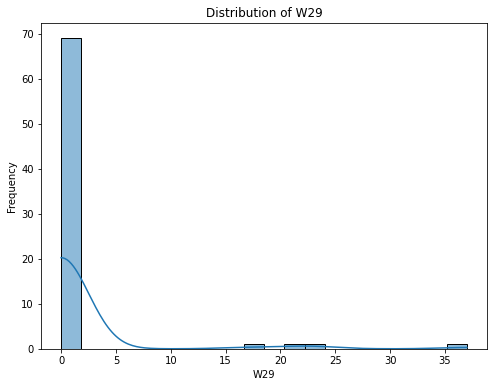

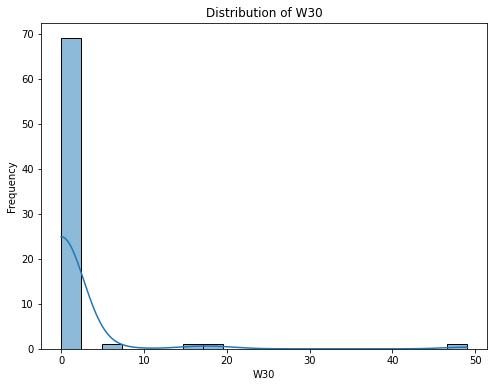

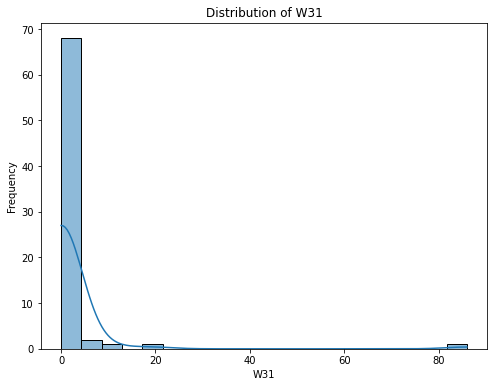

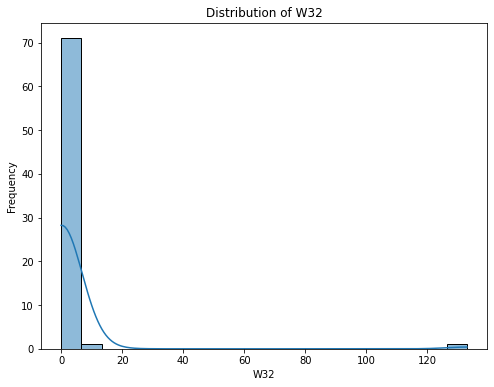

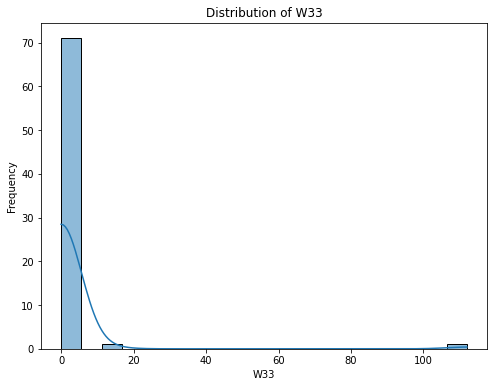

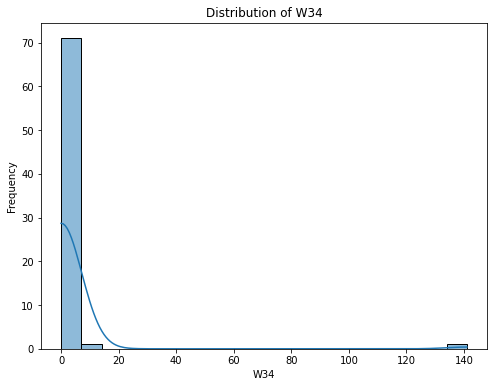

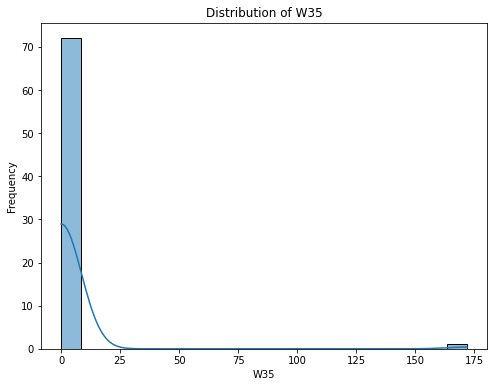

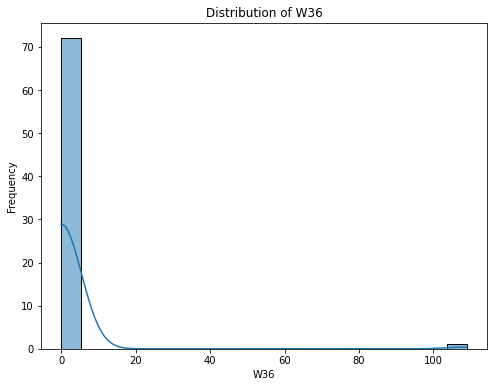

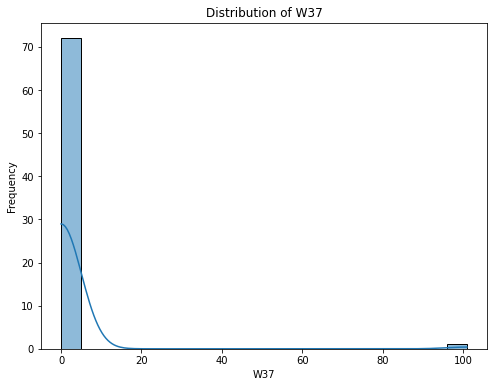

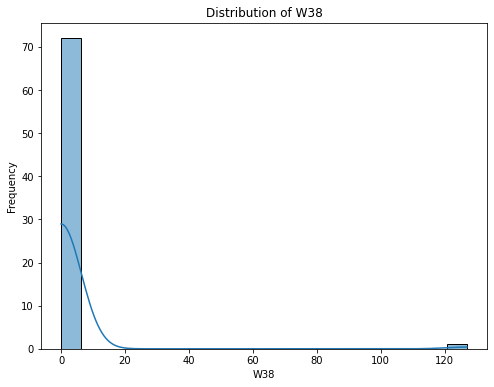

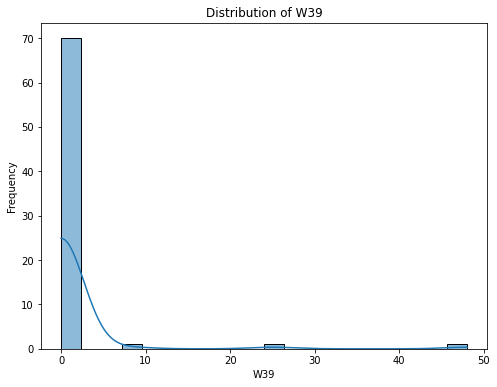

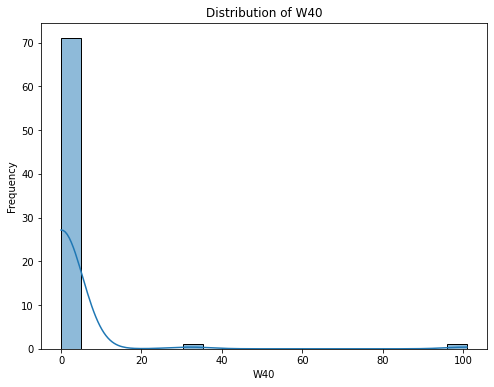

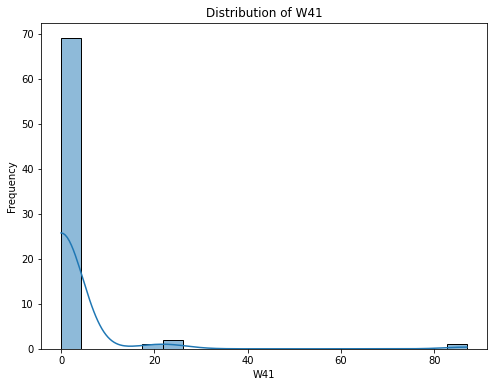

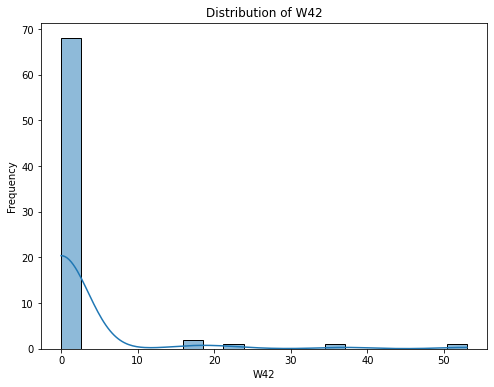

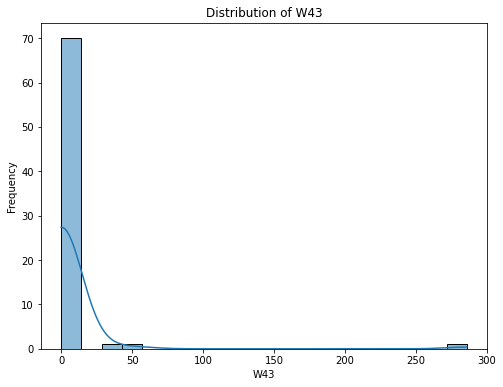

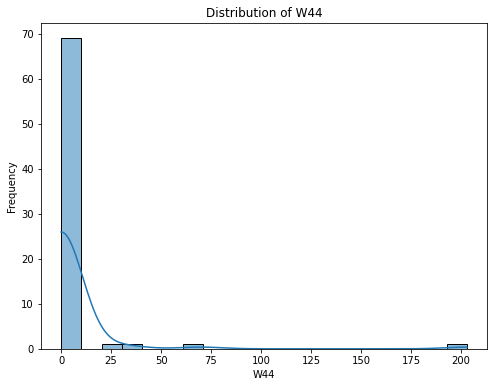

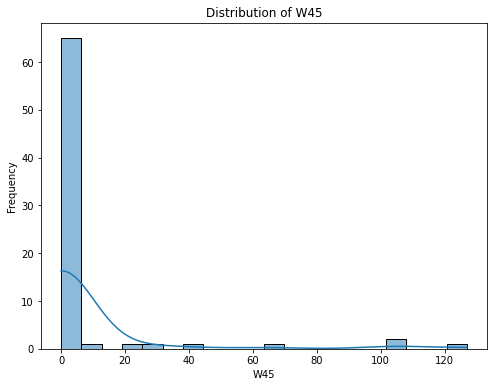

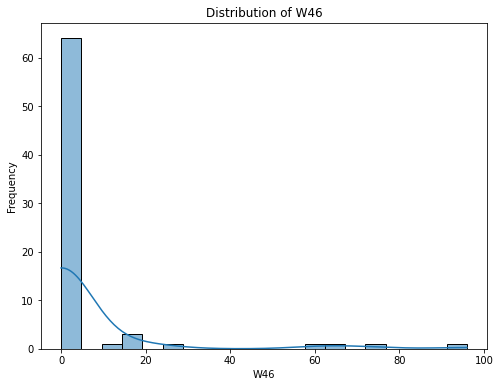

In [11]:
# Distribution Analysis
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

## Time Series Plot by Province

Grouping by Province: The dataset is grouped by the 'Província' column to identify unique provinces.

Visualization: Time series plots are created for each province, showing the values across different weeks (W1 to W52). Each plot represents the variation of values over time for a specific province.

Layout: Plots are organized in a grid layout, with multiple plots displayed in each row. The number of plots per row can be adjusted based on the number of unique provinces.

Insights: Time series plots allow us to observe trends, seasonality, and patterns in the data for each province separately. They help identify variations and anomalies specific to individual provinces.

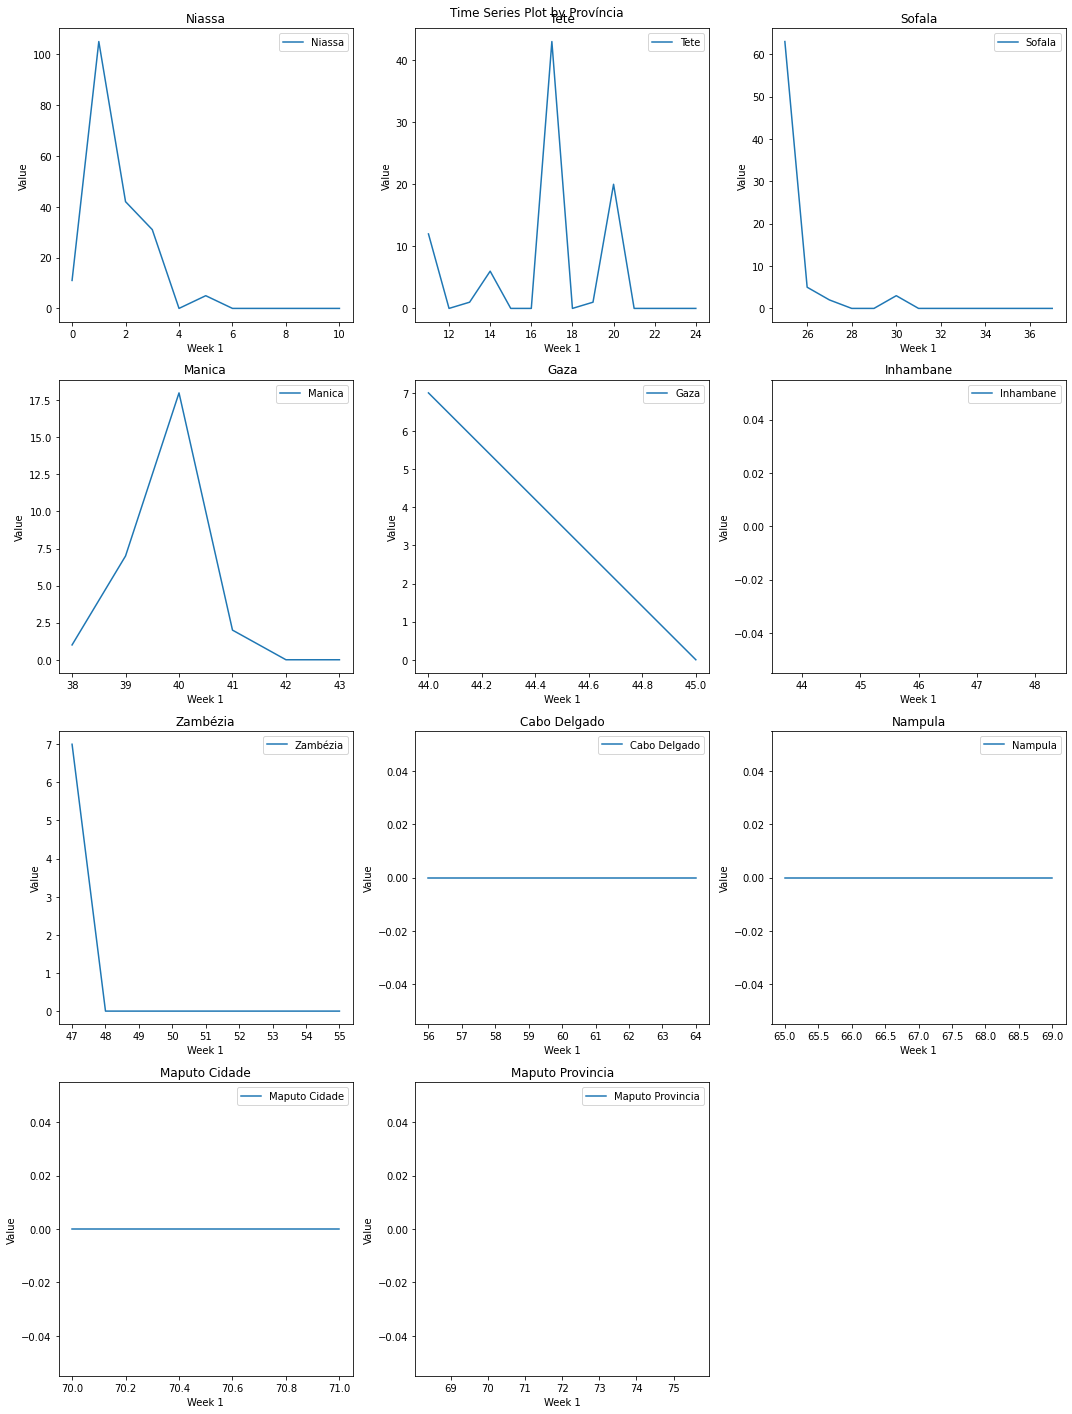

In [12]:
for col in ['Província']:
    categories = data[col].unique()
    num_categories = len(categories)
    num_plots_per_row = 3  # You can adjust the number of plots per row as per your preference
    num_rows = (num_categories + num_plots_per_row - 1) // num_plots_per_row

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows), squeeze=False)
    fig.suptitle(f'Time Series Plot by {col}')

    for i, category in enumerate(categories):
        row = i // num_plots_per_row
        col_num = i % num_plots_per_row
        ax = axes[row, col_num]
        subset = data[data[col] == category]
        ax.plot(subset['W1'], label=category)
        ax.set_xlabel('Week 1')
        ax.set_ylabel('Value')
        ax.set_title(category)
        ax.legend()

    # Hide unused subplots
    for i in range(num_categories, num_rows * num_plots_per_row):
        row = i // num_plots_per_row
        col_num = i % num_plots_per_row
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()

In [13]:
z_scores = zscore(data.select_dtypes(include=np.number))
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 19


## Cross-Correlation between Provinces

Identification of Unique Provinces: We identify the unique provinces in the dataset.
Cross-Correlation Calculation: For each pair of provinces (province1 and province2), we compute the cross-correlation between their respective time series data.

Visualization: The cross-correlation values are plotted against lag to visualize the relationship between the time series data of the two provinces. Each plot represents the cross-correlation between a specific pair of provinces.

Interpretation: Cross-correlation measures the similarity between the time series data of two provinces at different time lags. Positive cross-correlation values indicate a similar trend, while negative values indicate an inverse relationship. The lag at which the cross-correlation peaks indicates the time delay between the provinces' data.

Insights: Understanding the cross-correlation between provinces helps identify temporal relationships and dependencies. It can reveal patterns of influence, synchronization, or lead-lag relationships between provinces' data.

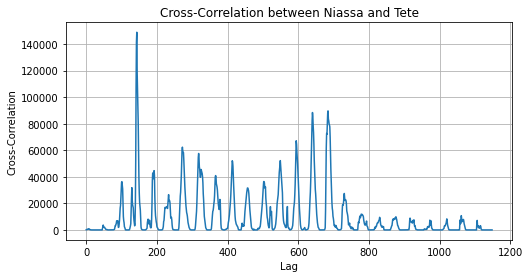

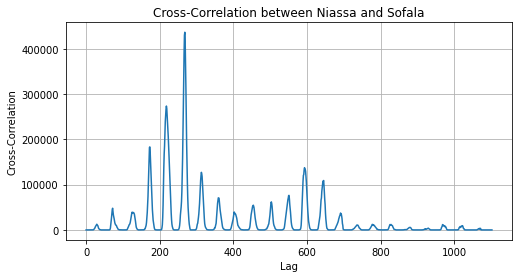

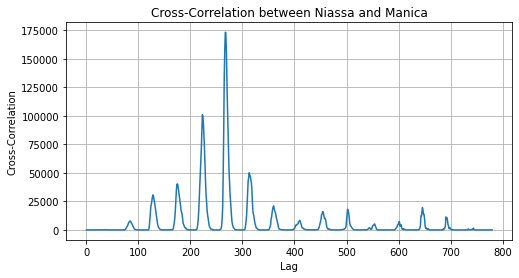

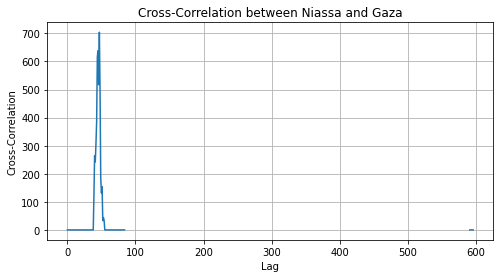

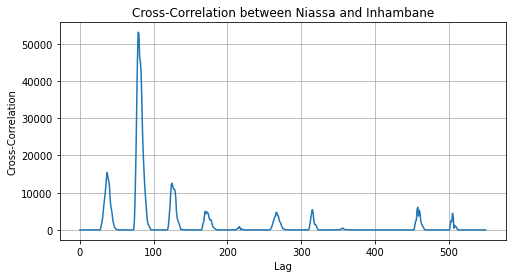

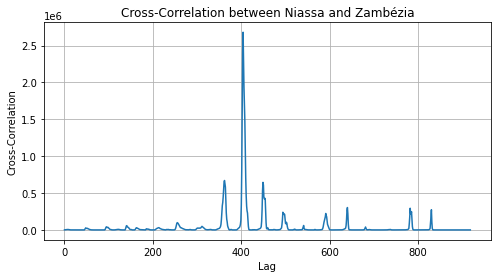

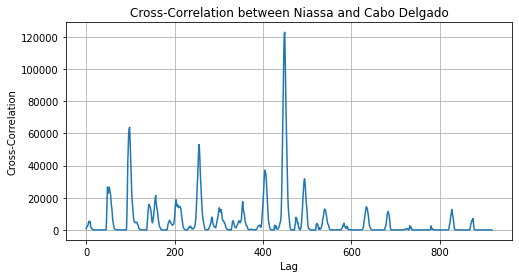

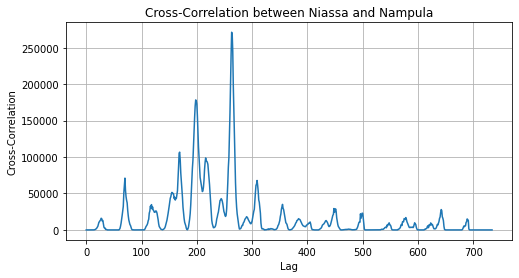

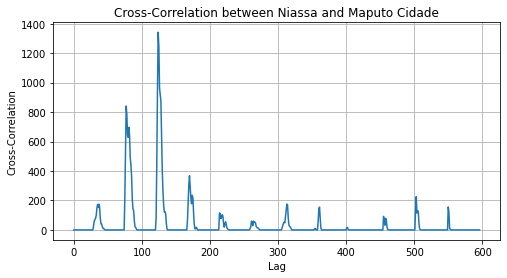

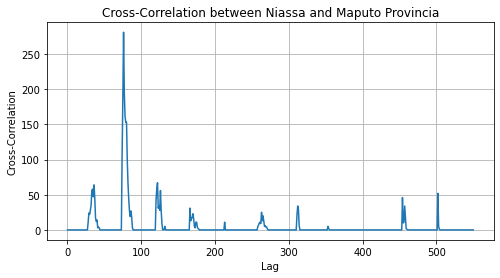

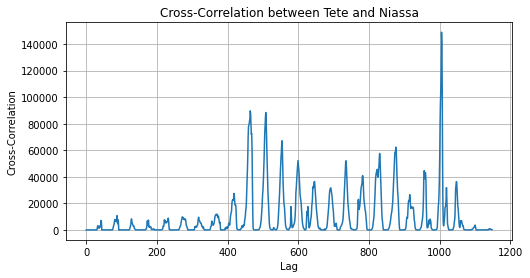

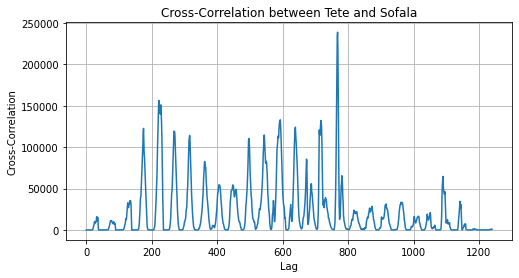

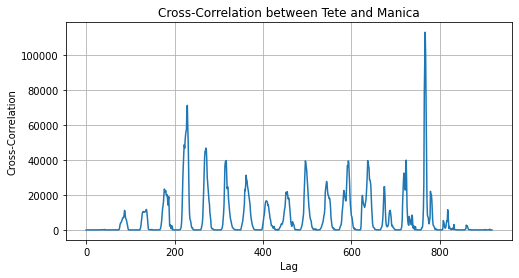

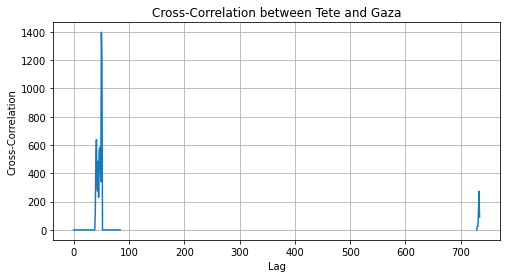

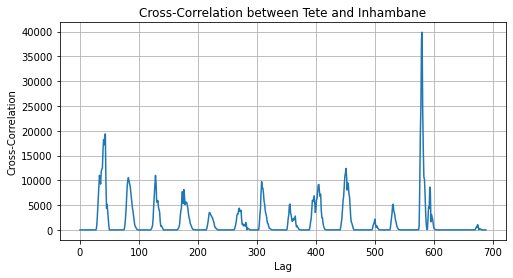

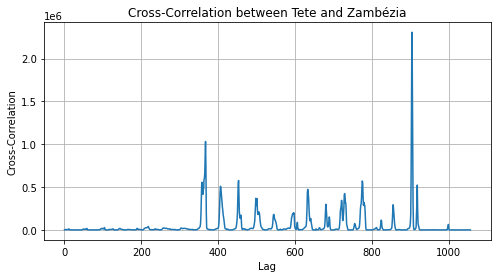

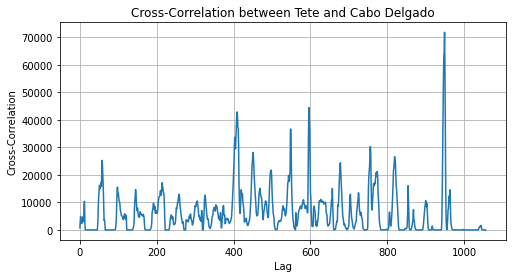

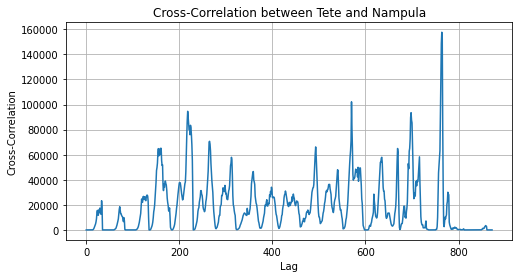

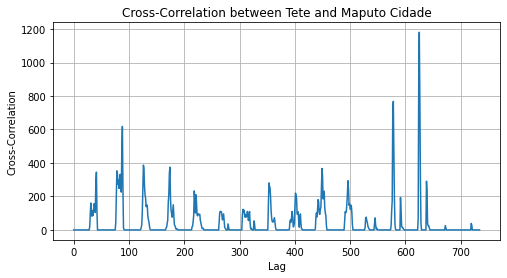

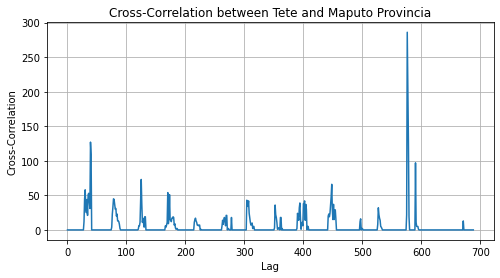

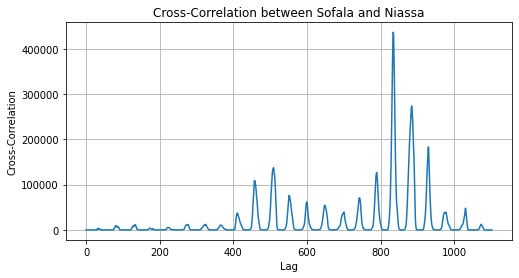

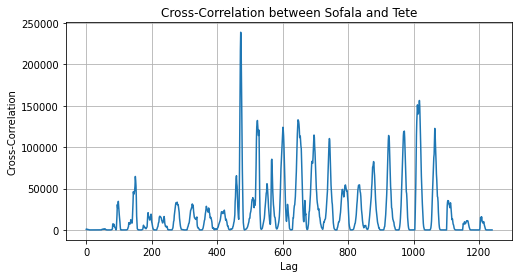

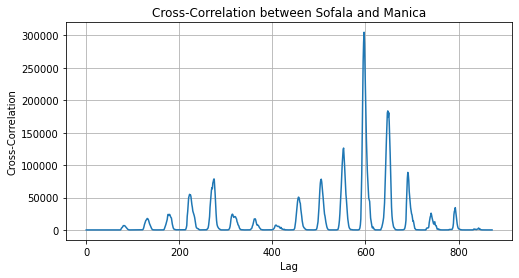

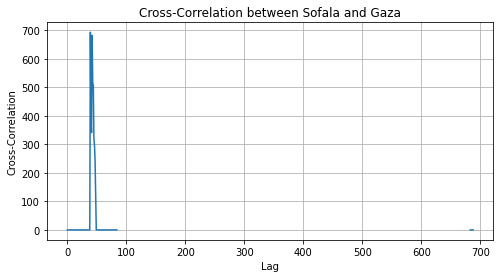

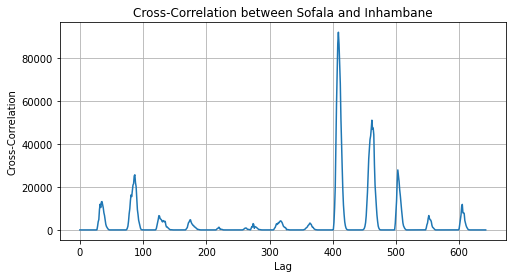

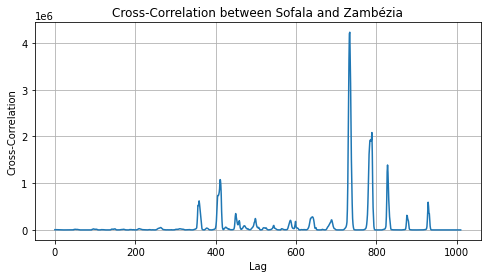

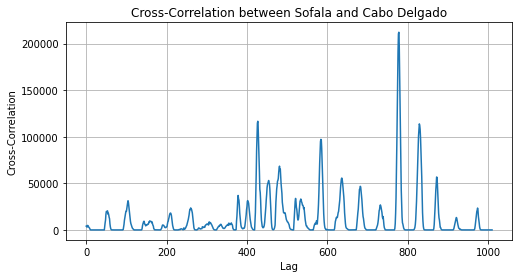

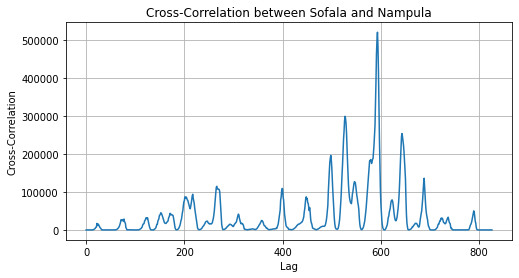

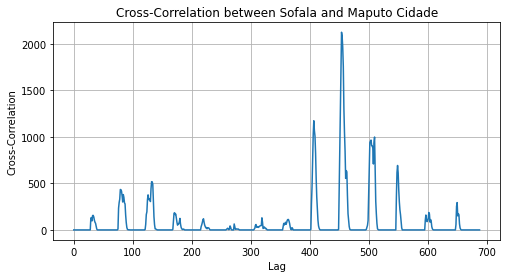

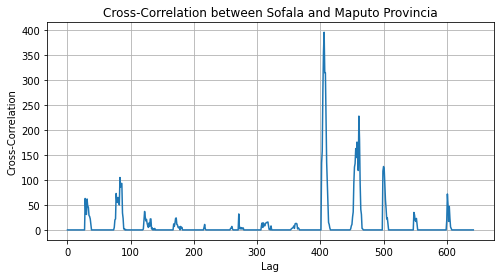

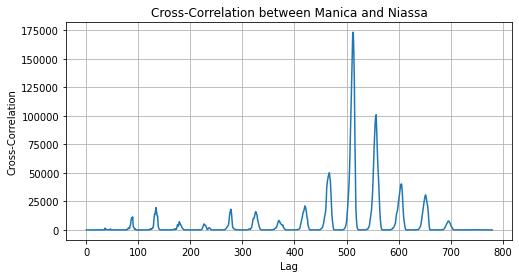

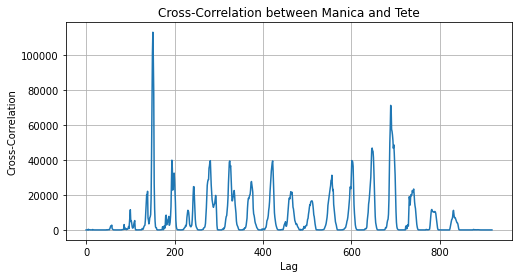

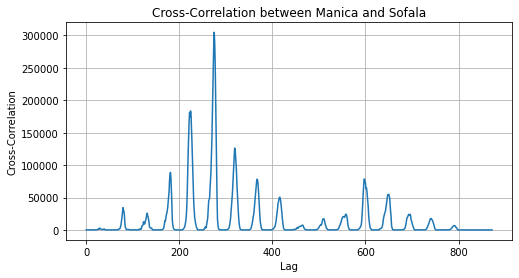

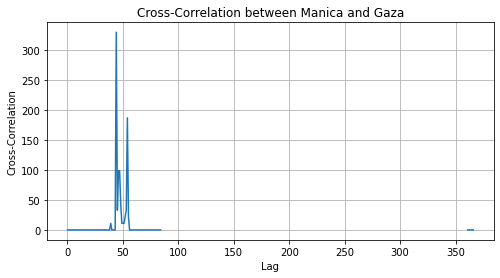

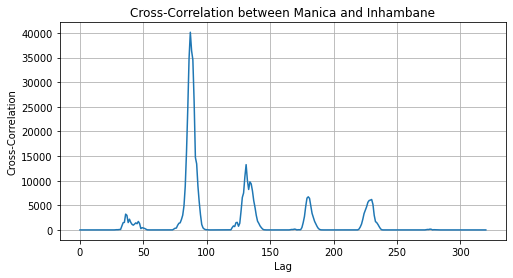

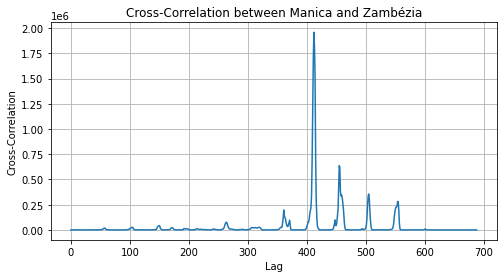

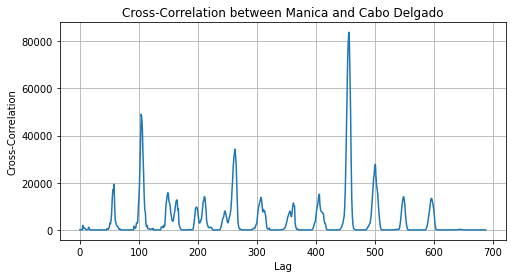

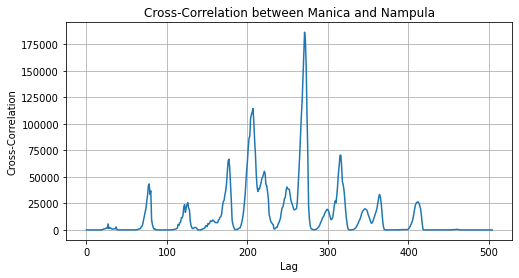

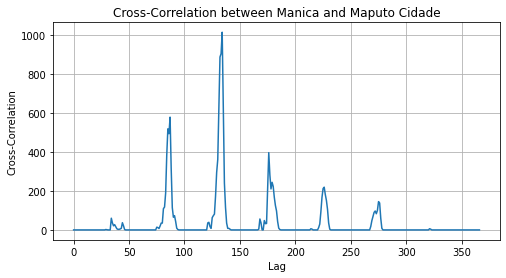

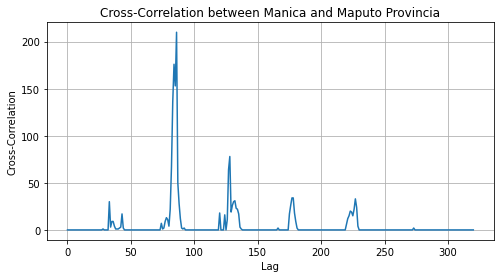

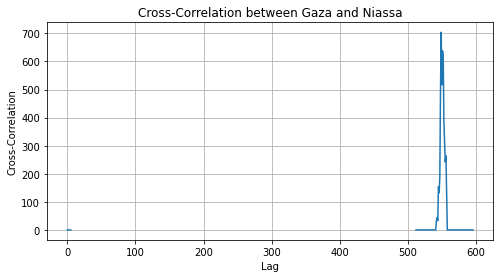

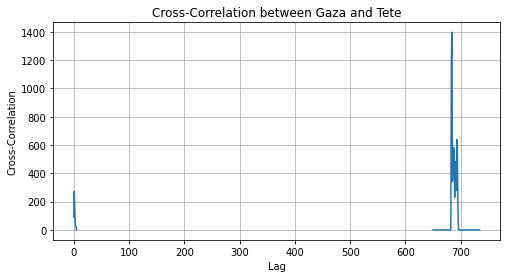

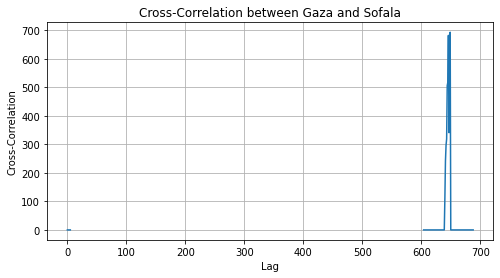

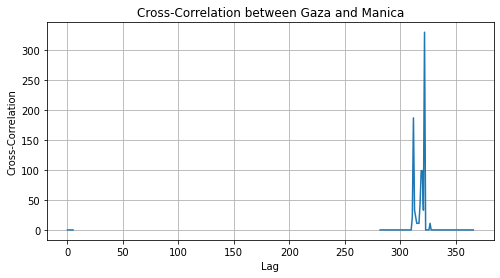

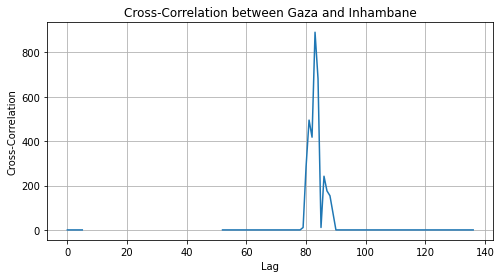

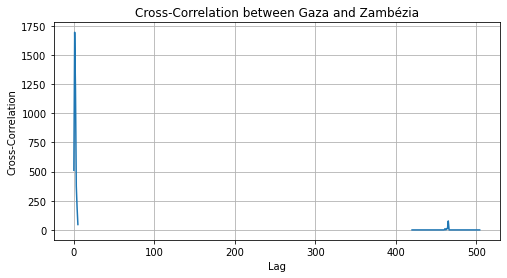

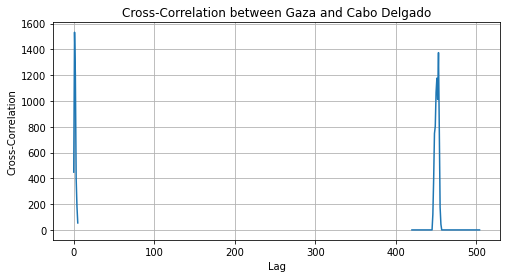

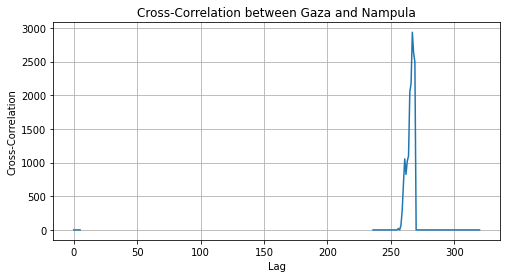

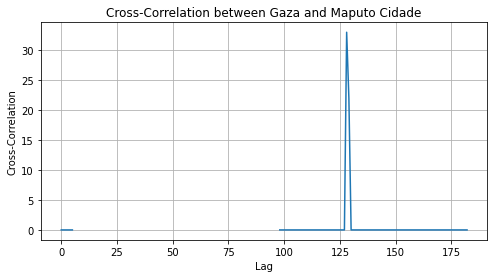

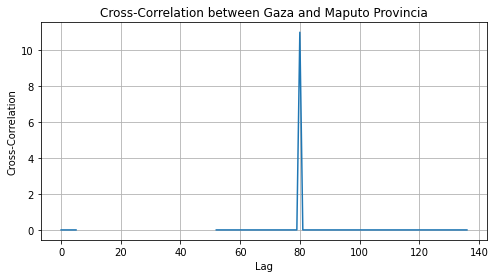

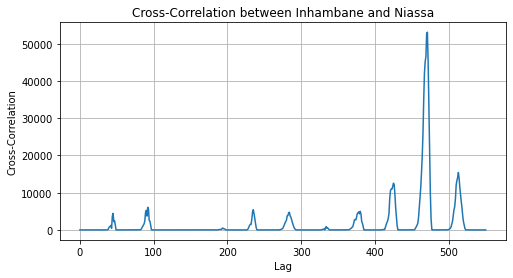

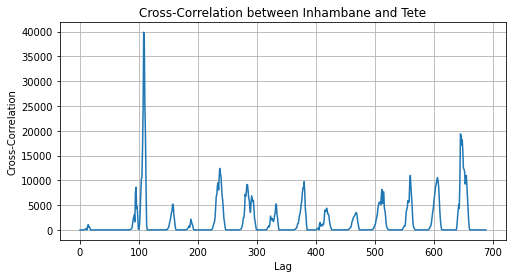

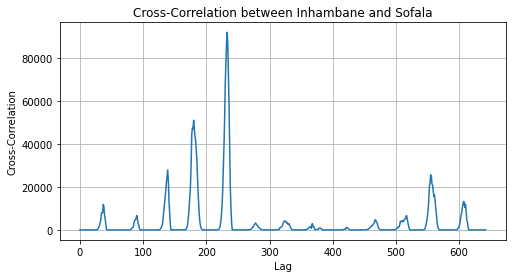

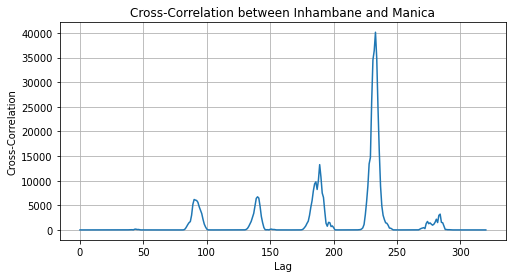

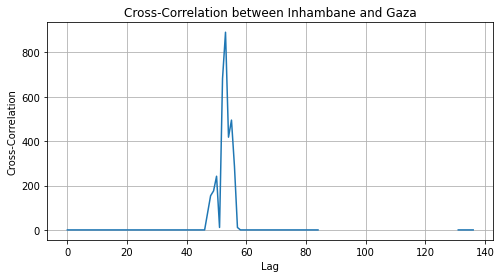

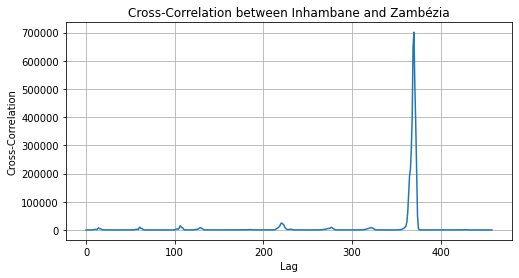

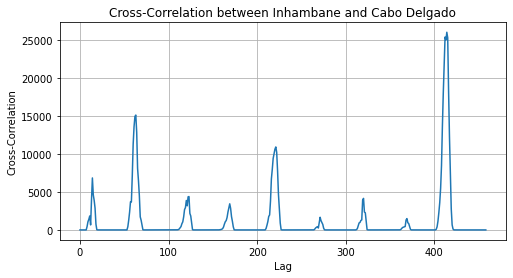

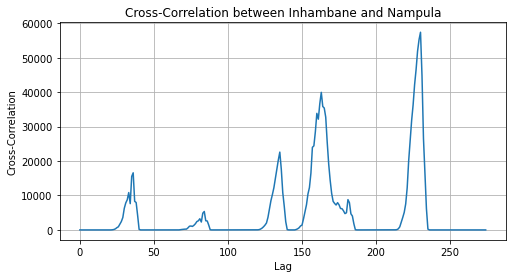

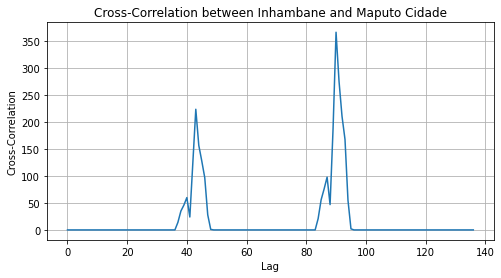

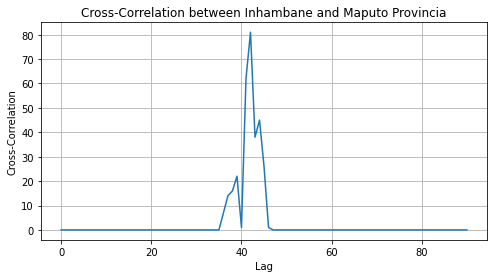

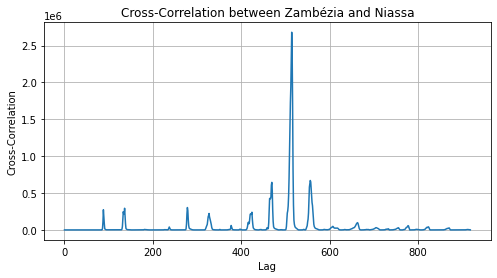

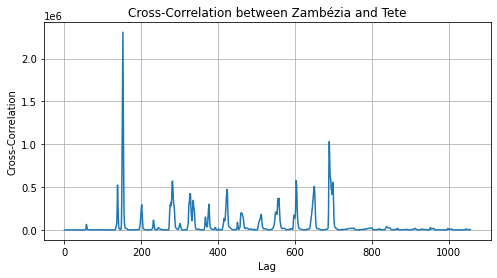

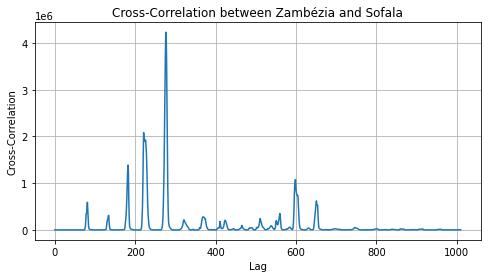

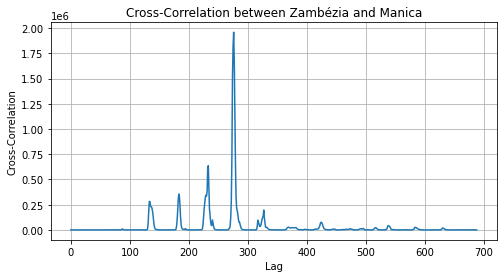

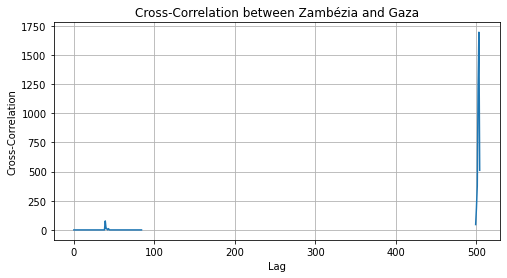

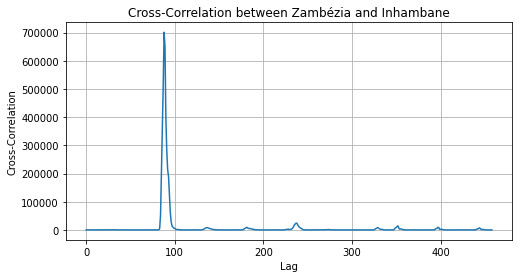

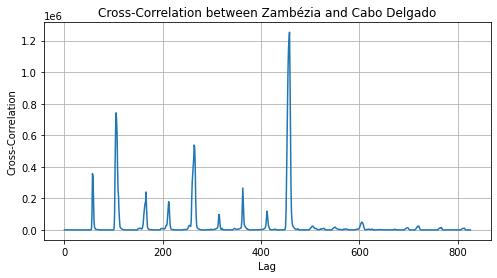

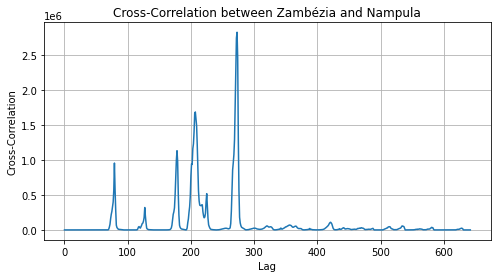

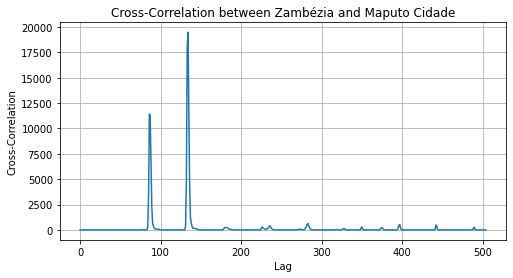

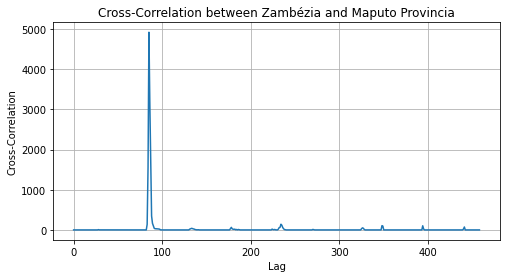

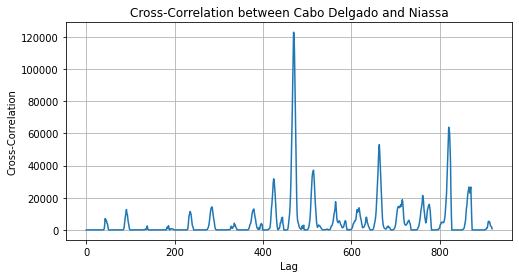

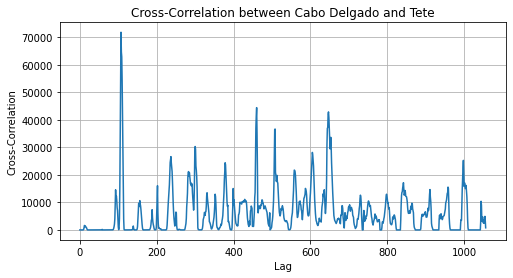

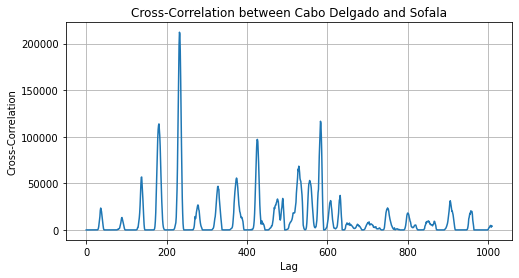

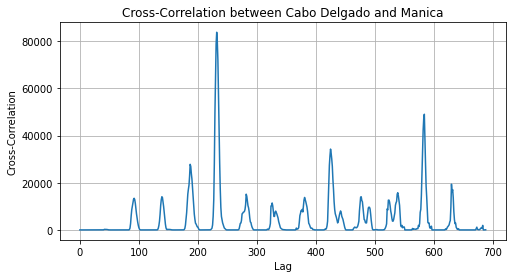

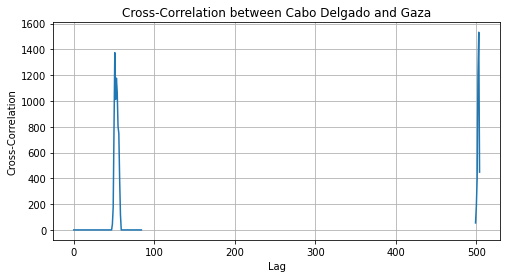

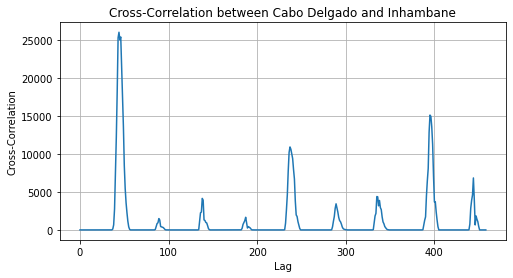

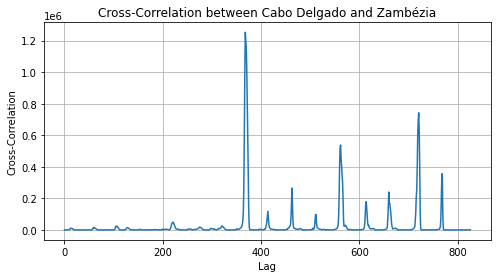

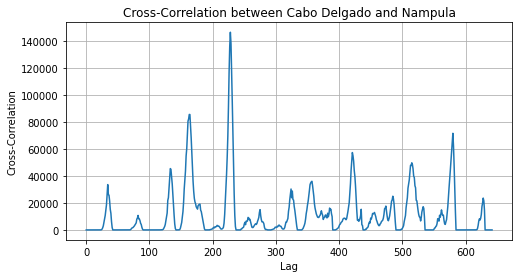

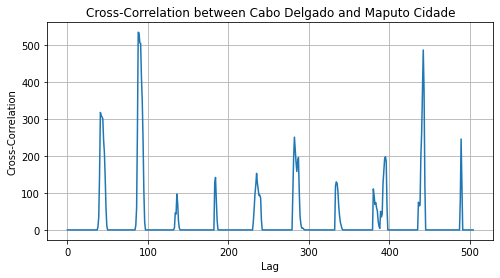

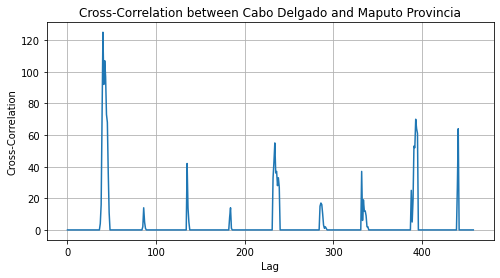

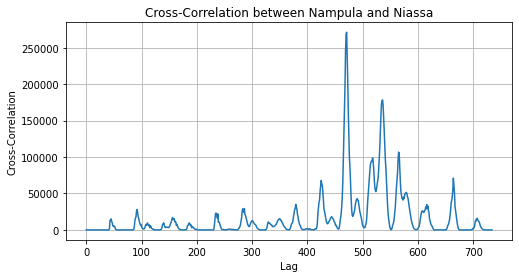

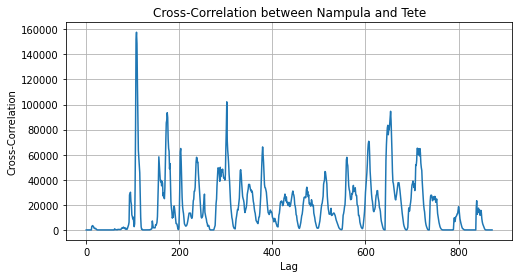

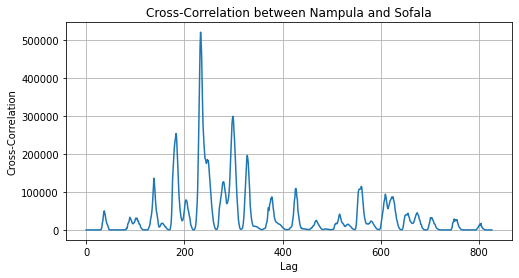

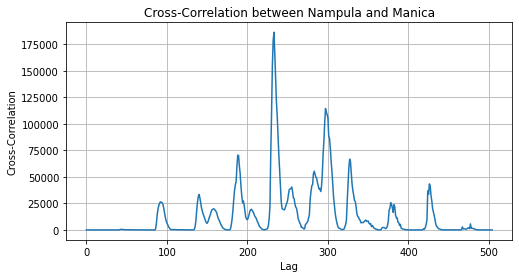

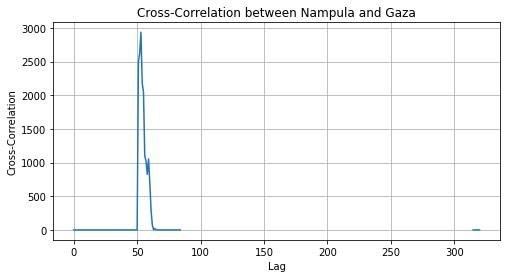

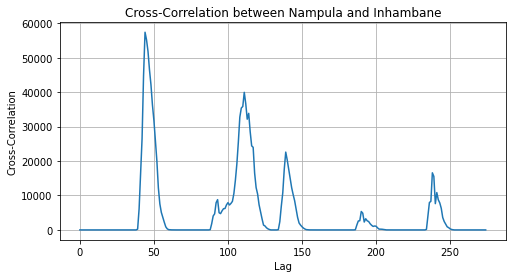

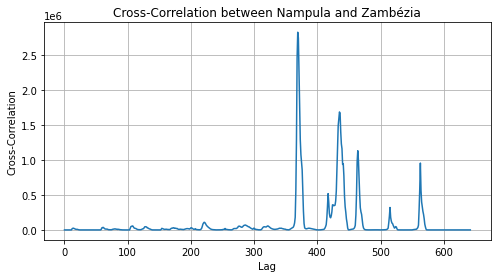

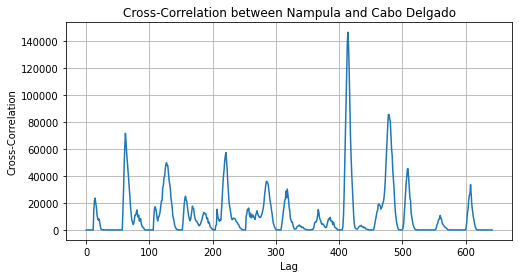

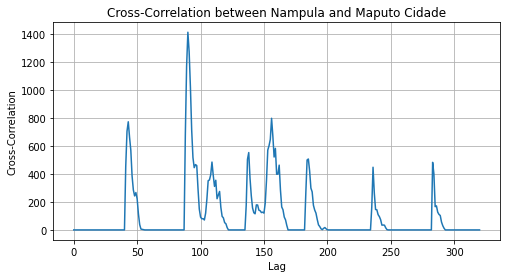

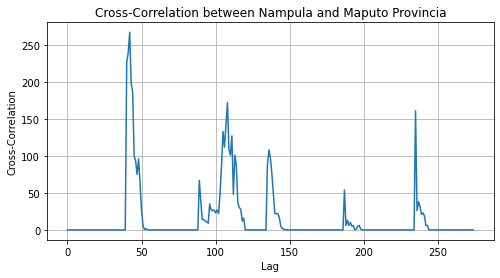

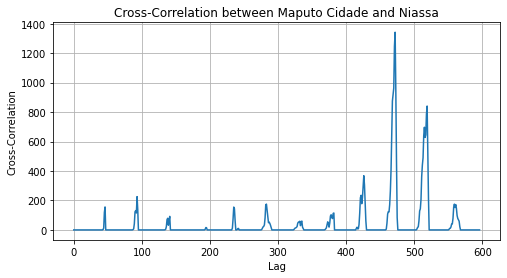

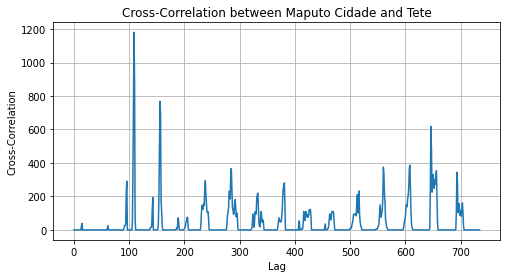

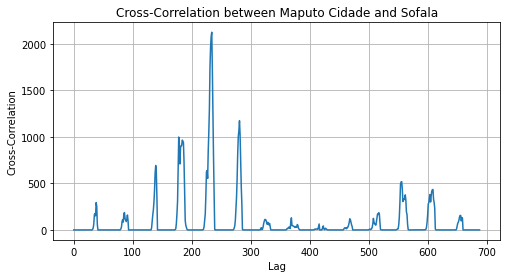

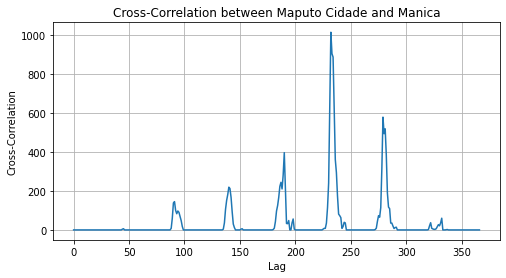

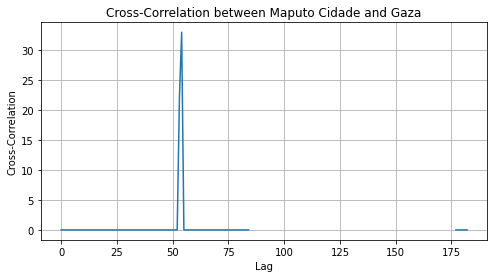

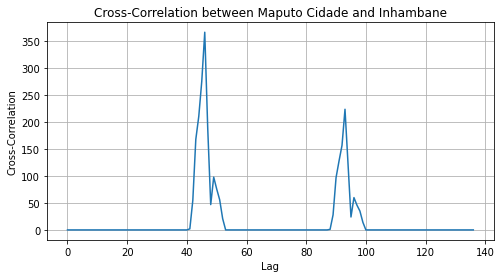

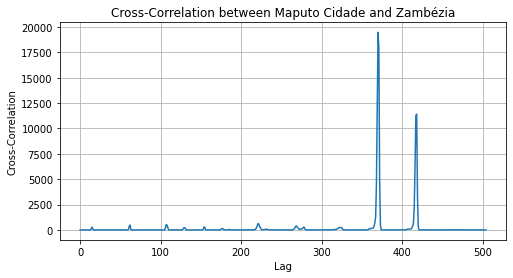

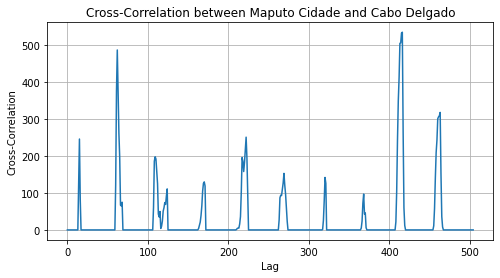

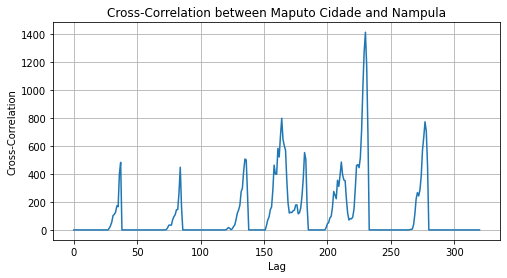

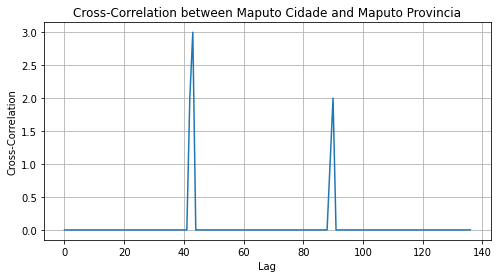

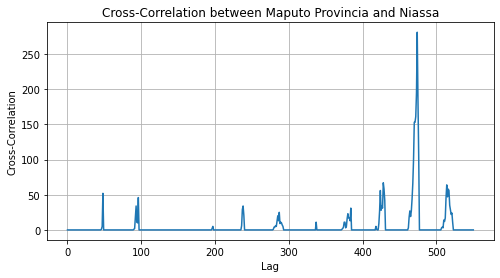

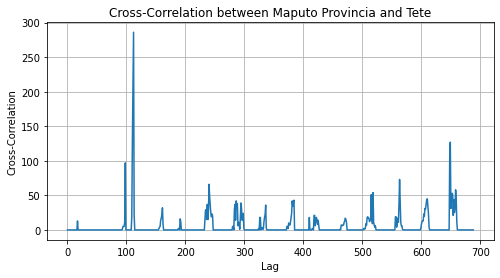

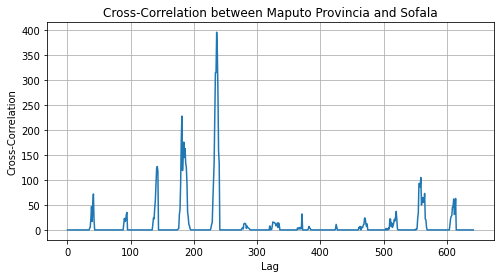

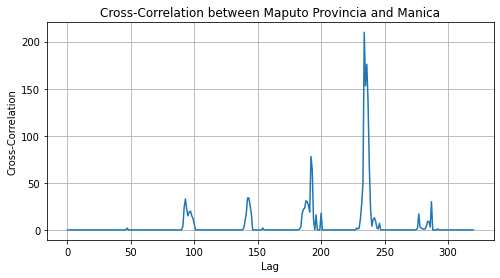

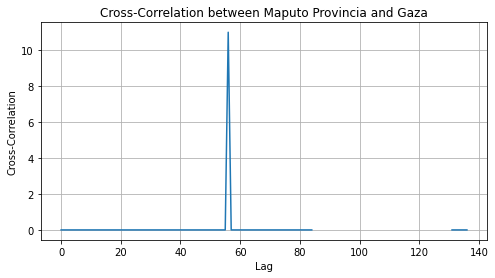

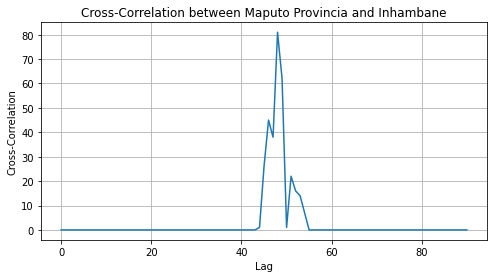

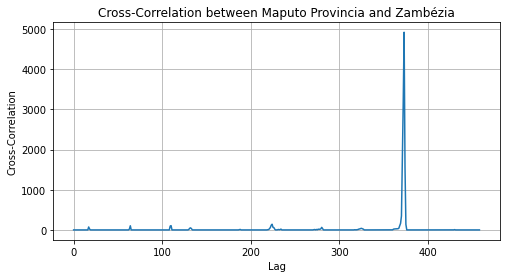

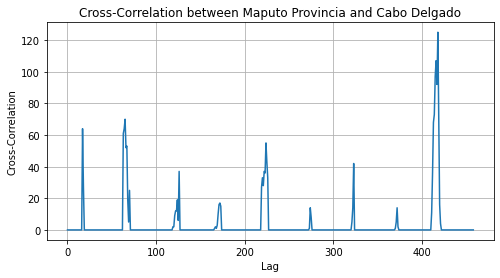

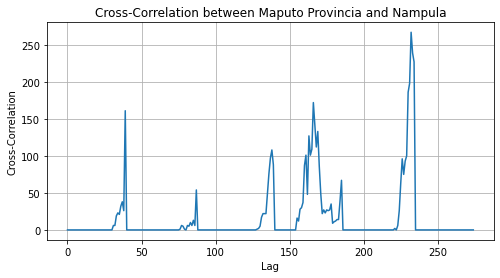

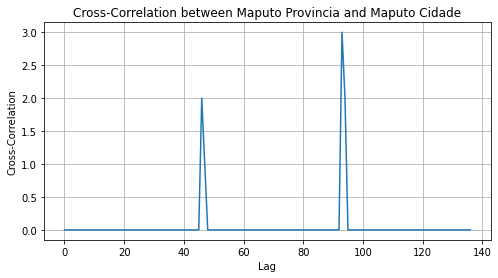

In [14]:
# Assuming 'Province' and 'District' are categorical columns
provinces = data['Província'].unique()

# Compute cross-correlation for each pair of provinces
for province1 in provinces:
    for province2 in provinces:
        if province1 != province2:
            province1_data = data[data['Província'] == province1].drop(columns=['Província', 'Distrito'])
            province2_data = data[data['Província'] == province2].drop(columns=['Província', 'Distrito'])

            # Compute cross-correlation between province1 and province2
            cross_corr = np.correlate(province1_data.values.flatten(), province2_data.values.flatten(), mode='full')

            # Plot cross-correlation
            plt.figure(figsize=(8, 4))
            plt.plot(cross_corr)
            plt.title(f'Cross-Correlation between {province1} and {province2}')
            plt.xlabel('Lag')
            plt.ylabel('Cross-Correlation')
            plt.grid(True)
            plt.show()

## Long-Term Trend Analysis for Each Province

Data Preparation: We filter the dataset to extract data specific to each province, removing the 'Province' and 'District' columns to focus solely on the weekly data.

Mean Value Calculation: We compute the mean value across weeks for each year within the province's data.

Linear Regression Modeling: Using linear regression, we fit a trend line to the mean values across weeks to capture the long-term trend for each province.

Prediction: We use the fitted model to predict trend values for each week.

Visualization: The original mean values and the trend line are visualized on a scatter plot. The trend line represents the long-term trend observed in the province's data.

Interpretation: By analyzing the trend line, we can identify whether the province's data exhibits an upward, downward, or stable long-term trend over time.

Insights: Understanding the long-term trends in each province's data is valuable for identifying patterns, forecasting future trends, and making informed decisions related to resource allocation, policy-making, and planning.

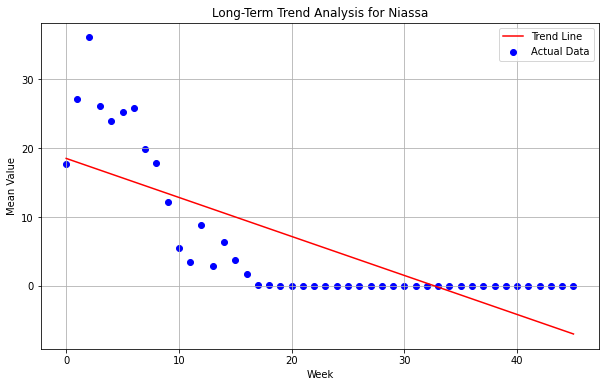

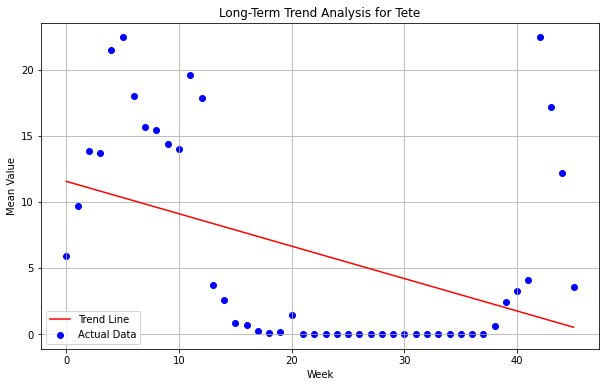

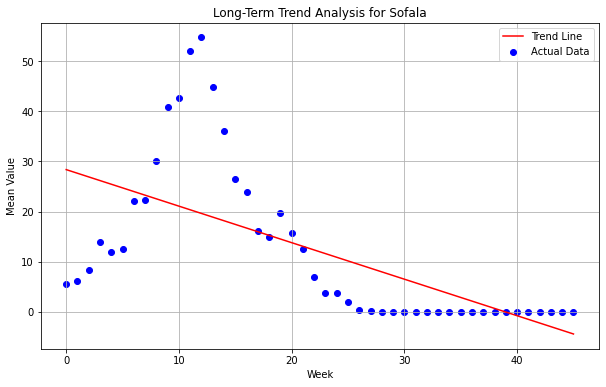

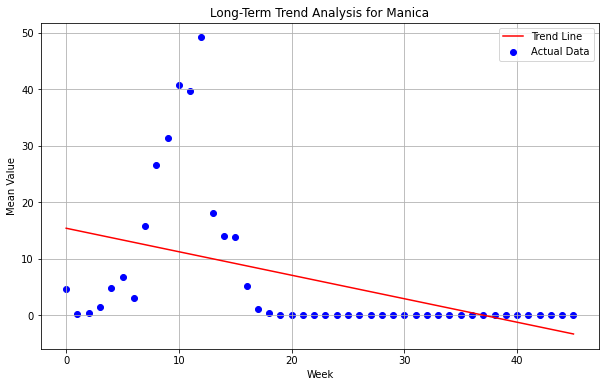

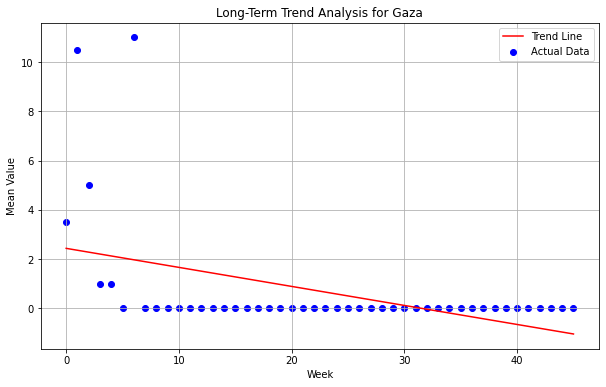

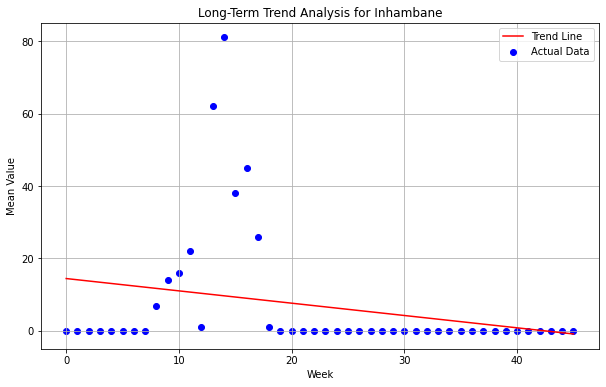

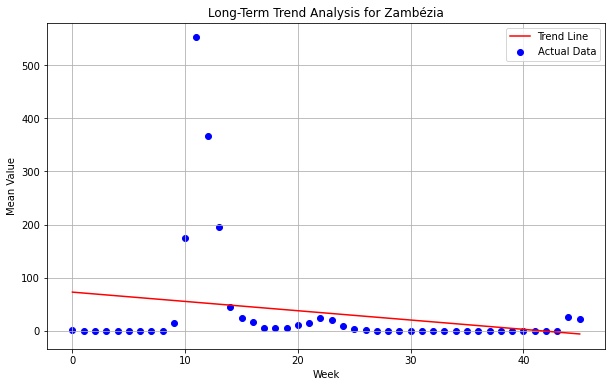

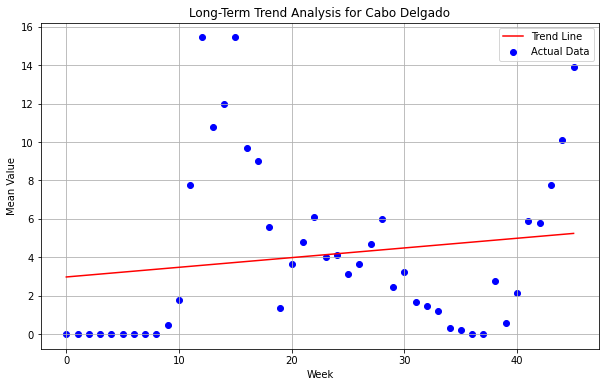

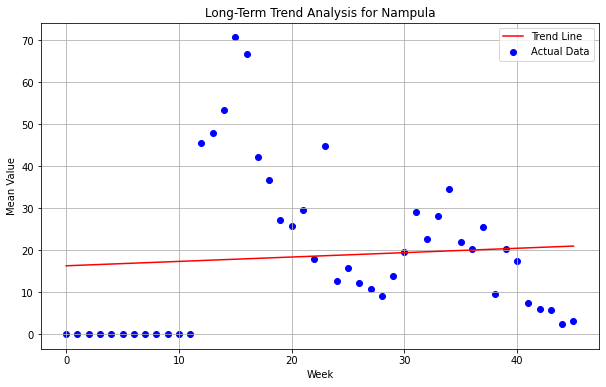

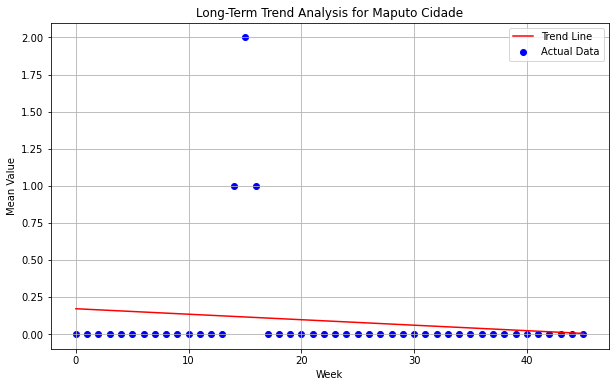

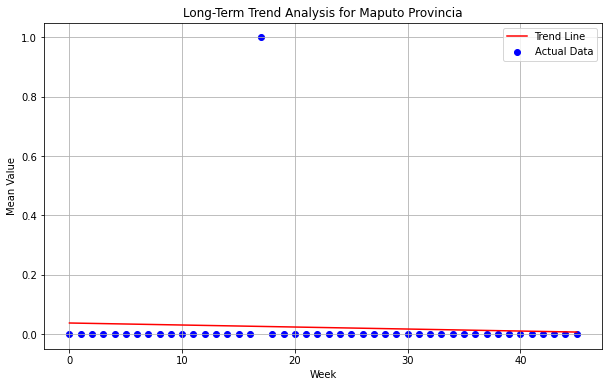

In [15]:
# Perform long-term trend analysis for each province
for province in provinces:
    province_data = data[data['Província'] == province].drop(columns=['Província', 'Distrito'])
    
    # Compute the mean value across weeks for each year
    weekly_mean = province_data.mean(axis=0)
    
    # Extract weeks and values
    weeks = np.arange(len(weekly_mean)).reshape(-1, 1)
    values = weekly_mean.values.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(weeks, values)
    
    # Predict values using the model
    trend_values = model.predict(weeks)
    
    # Plot the trend line and original data
    plt.figure(figsize=(10, 6))
    plt.scatter(weeks, values, color='blue', label='Actual Data')
    plt.plot(weeks, trend_values, color='red', label='Trend Line')
    plt.title(f'Long-Term Trend Analysis for {province}')
    plt.xlabel('Week')
    plt.ylabel('Mean Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# DATA MODELING

In [16]:
# Drop 'Província' and 'Distrito' columns if not needed for modeling
data.drop(columns=['Província', 'Distrito'], inplace=True)

# Convert the index to datetime if applicable
data.set_index(pd.to_datetime(data.index), inplace=True)

In [17]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [18]:
# Define evaluation function
def evaluate_forecast(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return rmse

# FOR SARIMAX MODEL

In [23]:
# SARIMAX modeling with adjustments
sarimax_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Adjust seasonality as per your data
sarimax_rmse_list = []

for column in train_data.columns:
    try:
        # Train SARIMAX model for each column
        sarimax_model = SARIMAX(train_data[column], order=sarimax_order, seasonal_order=seasonal_order,
                                enforce_stationarity=False) 
        sarimax_fit = sarimax_model.fit(disp=0)
        sarimax_forecast = sarimax_fit.forecast(steps=len(test_data))
        sarimax_rmse = evaluate_forecast(test_data[column], sarimax_forecast)
        sarimax_rmse_list.append(sarimax_rmse)
    except Exception as e:
        print(f"Error occurred in SARIMAX modeling for column {column}: {str(e)}")

# Take the mean RMSE across all columns
mean_sarimax_rmse = np.mean(sarimax_rmse_list)
print(f"Mean SARIMAX RMSE: {mean_sarimax_rmse:.2f}")

Mean SARIMAX RMSE: 108.61


In [31]:
# Display SARIMAX model matrices and parameters
print("SARIMAX Model Matrices and Parameters:")
print("Parameter Names:", sarimax_fit.param_names)
print("Parameters:", sarimax_fit.params)
print("Number of Differences:", sarimax_model.k_diff)
print("Number of Trend Terms:", sarimax_model.k_trend)
print("Seasonal Periods:", sarimax_model.seasonal_periods)

SARIMAX Model Matrices and Parameters:
Parameter Names: ['ar.L1', 'ma.L1', 'ar.S.L12', 'ma.S.L12', 'sigma2']
Parameters: ar.L1        -0.725191
ma.L1         0.154919
ar.S.L12     -0.506257
ma.S.L12      0.037626
sigma2      438.243098
dtype: float64
Number of Differences: 1
Number of Trend Terms: 0
Seasonal Periods: 12


In [34]:
# For SARIMAX Model
# Fit the SARIMAX model
sarimax_fit = sarimax_model.fit()

# Convert the forecast array into a pandas Series
sarimax_forecast_series = pd.Series(sarimax_forecast, name='Forecast')

# Create a DataFrame to show the predicted data for other weeks
predicted_data_sarimax = pd.DataFrame(sarimax_forecast_series, columns=['Week_{}'.format(i) for i in range(1)])

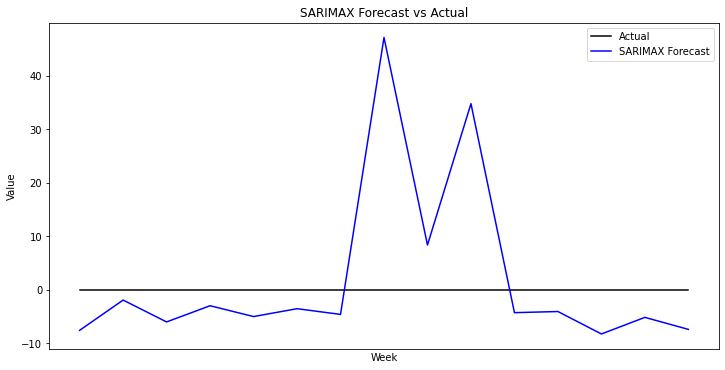

In [35]:
# Plotting SARIMAX forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['W1'], label='Actual', color='black')
plt.plot(test_data.index, sarimax_forecast_series, label='SARIMAX Forecast', color='blue')
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('SARIMAX Forecast vs Actual')
plt.legend()
plt.show()

# FOR ARIMA MODEL

In [26]:
# ARIMA modeling
arima_order = (1, 1, 1)
arima_rmse_list = []

for column in train_data.columns:
    try:
        # Train ARIMA model for each column
        arima_model = ARIMA(train_data[column], order=arima_order)
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=len(test_data))
        arima_rmse = evaluate_forecast(test_data[column], arima_forecast)
        arima_rmse_list.append(arima_rmse)
    except Exception as e:
        print(f"Error occurred in ARIMA modeling for column {column}: {str(e)}")
        
# Take the mean RMSE across all columns
mean_arima_rmse = np.mean(arima_rmse_list)
print(f"Mean ARIMA RMSE: {mean_arima_rmse:.2f}")

Mean ARIMA RMSE: 26.79


In [27]:
# Display ARIMA model matrices and parameters
print("\nARIMA Model Matrices and Parameters:")
print("ARIMA Order:", arima_model.order)
print("ARIMA Seasonal Order:", arima_model.seasonal_order)
print("Number of Differences:", arima_model.k_diff)


ARIMA Model Matrices and Parameters:
ARIMA Order: (1, 1, 1)
ARIMA Seasonal Order: (0, 0, 0, 0)
Number of Differences: 1


In [29]:
# For ARIMA Model
# Fit the ARIMA model
arima_fit = arima_model.fit()

# Convert the forecast array into a pandas Series
arima_forecast_series = pd.Series(arima_forecast, name='Forecast')

# Create a DataFrame to show the predicted data for other weeks
predicted_data_arima = pd.DataFrame(arima_forecast_series, columns=['Forecast'])

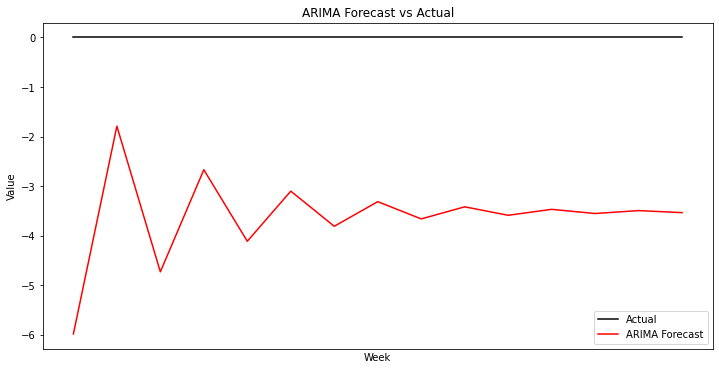

In [30]:
# Plotting ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[:len(arima_forecast_series)], test_data['W1'][:len(arima_forecast_series)], label='Actual', color='black')
plt.plot(test_data.index[:len(arima_forecast_series)], arima_forecast_series, label='ARIMA Forecast', color='red')
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

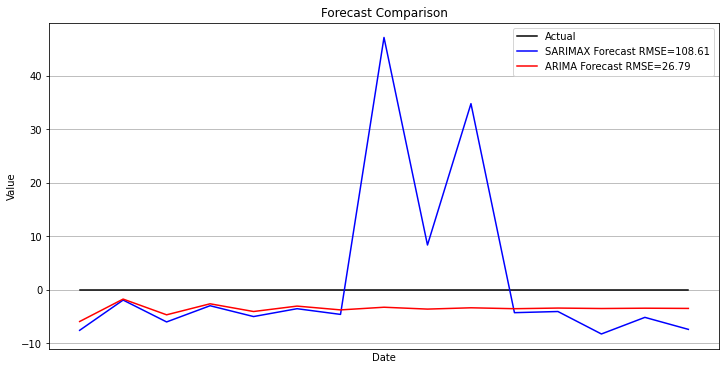

In [36]:
# Visualize forecasts (you may customize this part according to your needs)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.iloc[:, 0], label='Actual', color='black')  # Adjust column index as per your data
plt.plot(test_data.index, sarimax_forecast, label=f'SARIMAX Forecast RMSE={mean_sarimax_rmse:.2f}', color='blue')
plt.plot(test_data.index, arima_forecast, label=f'ARIMA Forecast RMSE={mean_arima_rmse:.2f}', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast Comparison')
plt.legend()
plt.grid(True)
plt.show()